In [36]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
import matplotlib.cm as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from re import findall as find
from pathlib import Path
from tqdm import tqdm

In [59]:
testfolder="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/"
testimages=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/CP/"+"*.tif"))
testfile=sorted(glob(testfolder+"*.txt"))
def get_data(file):
    datanp=np.loadtxt(file,skiprows=3,delimiter=",")
    x=datanp[:,0]
    y=datanp[:,1]
    u=datanp[:,2]
    v=datanp[:,3]
    magnitude=np.sqrt(u**2+v**2)
    direction=np.arctan2(v,u)
    return x,y,u,v,magnitude,direction

def get_central_point(folder):
    if "ResultsCenter.csv" in os.listdir(folder):
        df=pd.read_csv(folder+"/ResultsCenter.csv")
        return df["X"][0],df["Y"][0]
    else:
        x,y,u,v,magnitude,direction=get_data(folder)
        # Define threshold angle (in radians)
        threshold_angle = np.deg2rad(10) 
        # Group vectors based on their direction
        groups = []
        for i in range(len(direction)):
            grouped = False
            for group in groups:
                if np.any(np.abs(group - direction[i]) < threshold_angle):
                    group.append(direction[i])
                    grouped = True
                    break
            if not grouped:
                groups.append([direction[i]])
        # Calculate centroid for each group
        central_points = []
        for group in groups:
            group_indices = np.where(np.isin(direction, group))
            group_x = x[group_indices]
            group_y = y[group_indices]
            centroid = np.mean(group_x), np.mean(group_y)
            central_points.append(centroid)
        center_x=np.mean(x)
        center_y=np.mean(y)
        centerdist=np.sqrt(np.sum((central_points-np.array([center_x,center_y]))**2,axis=1))
        closest_index=np.argmin(centerdist)
        xcenter,ycenter=central_points[closest_index]
        return xcenter,ycenter
    
def plotfrstddist(folder):
    central_x,central_y=get_central_point(folder)
    files=sorted(glob(folder+"*1.txt"))
    files=[f.replace('\\', '/') for f in files]
    x,y,u,v,magnitude,directio=get_data(sorted(files)[0])
    print(sorted(files)[0])
    # Define distance ranges (you can adjust the number of ranges and the maximum radius)
    num_ranges = 10
    max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
    distances = np.linspace(0, max_radius, num_ranges)

    mean_magnitudes = []
    for i in tqdm(range(num_ranges - 1)):
        indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[i]) &
                        (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[i + 1]))

        mean_magnitude = np.nanmean(magnitude[indices])
        mean_magnitudes.append(mean_magnitude)
    # Visualize circular average as a function of distance

    fig, ax = plt.subplots(figsize=(7, 5.3))
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.plot(distances[:-1], mean_magnitudes, marker='x',label='magnitude')
    plt.xlabel('Distance from center')
    plt.ylabel('Circular mean direction')
    plt.title('Circular average as a function of distance from center')
    plt.legend()
    #plt.show()
    return(distances[:-1],mean_magnitudes)
def plotimagequiver(file,image,show=True):
    fig,ax=plt.subplots(figsize=(7, 5.3))
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    x,y,u,v,magnitude,direction=get_data(file)
    ax.imshow(image,cmap='gray')
    ax.quiver(x,y,u,v,magnitude)
    # xticks color white
    ax.get_xaxis().set_visible(False)
 
    # yticks color white
    ax.get_yaxis().set_visible(False)
    folder=os.path.dirname(file)

    filename=os.path.basename(file).replace(".txt",".png")

    os.makedirs(folder+"/Quiver/",exist_ok=True)
    plt.savefig(folder+f"/Quiver/Quiver_{filename}",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
    if show:
        plt.show()
    else:
        plt.close()

        
def plot_quiver(folder,x,y,u,v,magnitude,direction,show=True):
    fig, ax = plt.subplots()
    
    ax.quiver(x,y,u,v,magnitude)
    # Calculate weighted average of vector endpoints
    central_x, central_y = get_central_point(x,y,u,v,magnitude,direction)
    plt.scatter(central_x, central_y, color='r')
    os.makedirs(folder+"/QuiverRes/",exist_ok=True)
    plt.savefig(folder+'/QuiverRes/quiver.png')
    if show:
        plt.show()
    else:
        plt.close()

#for i in tqdm(range(len(testfile))):
    x,y,u,v,magnitude,direction=get_data(testfile[i])
    plot_quiver(testfolder,x,y,u,v,magnitude,direction)


TypeError: glob() missing 1 required positional argument: 'pathname'

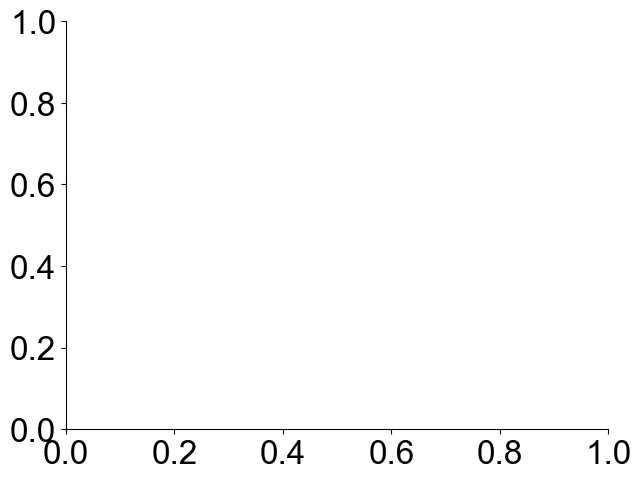

In [60]:
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
cmagpd=pd.DataFrame()
controlfolderlist=glob()
for i in tqdm(range(len(morphantfolderlist))):
    folder=morphantfolderlist[i]
    x,y,u,v,magnitude,directio=get_data(glob(folder+"*.txt")[0])
    central_x,central_y=get_central_point(folder)
    # Define distance ranges (you can adjust the number of ranges and the maximum radius)
    num_ranges = 10
    max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
    distances = np.linspace(0, max_radius, num_ranges)

    # Calculate circular mean direction for each distance range
    mean_directions = []
    mean_magnitudes = []
    for _ in range(num_ranges - 1):
        indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[_]) &
                        (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[_ + 1]))

        mean_magnitude = np.nanmean(magnitude[indices])
        mean_magnitudes.append(mean_magnitude)
    cmagpd[i]=mean_magnitudes


    #plt.plot(distances[:-1], mean_directions, marker='o',label='direction')
    plt.plot(distances[:-1], mean_magnitudes, marker='x',label=morphantfolderlist[i][-14:-11])
    plt.xlabel('Distance from center')
    plt.ylabel('')
    plt.title('Circular average as a function of distance from center')
    plt.legend()

In [61]:
morphantfolderlist=[path.replace('\\', '/') for path in morphantfolderlist]
morphantfolderlist

['H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/',
 'H:/PHD_data/Imaging_et

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.py:32: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.py:32: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 30%|███       | 3/10 [00:00<00:00, 26.39it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.py:32: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.py:32: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 60%|██████    | 6/10 [00:00<00:00, 14.65it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.py:32: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\2198691796.p

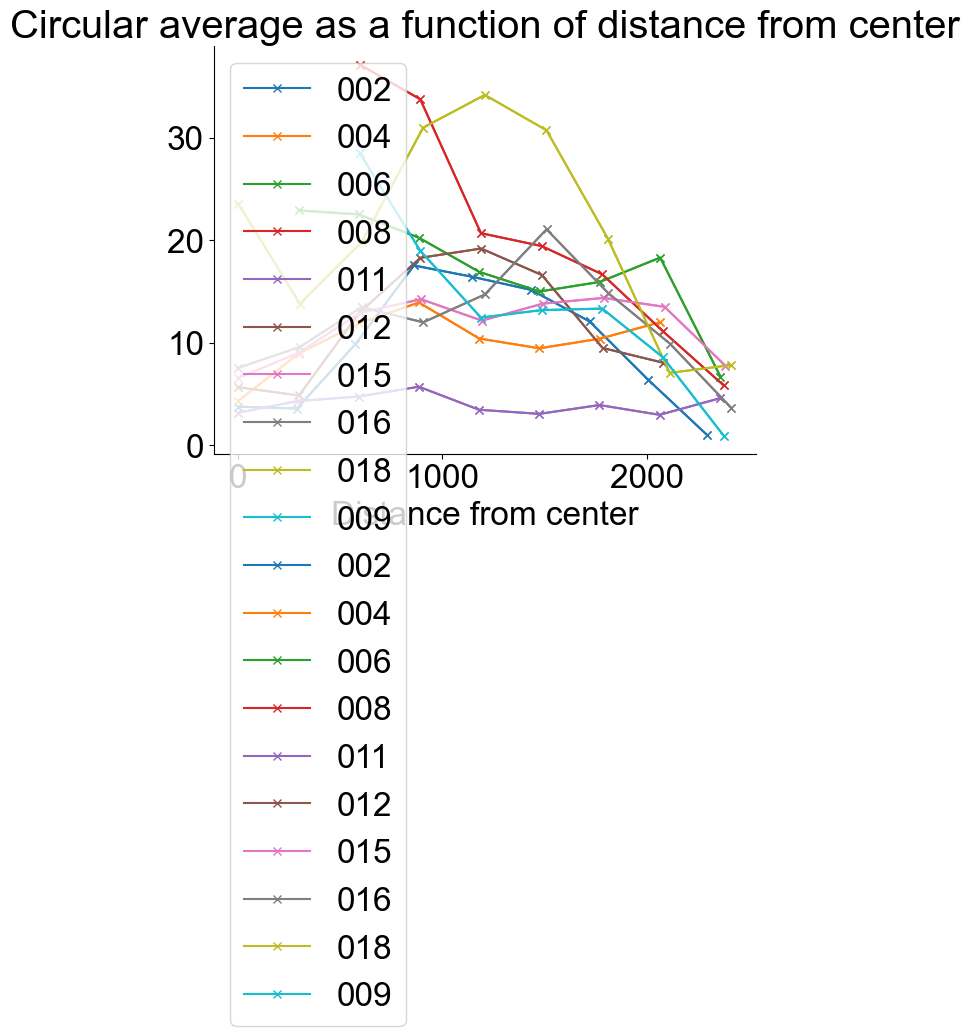

In [62]:
morphantfolderlist=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSr*/PIV/ASCII/"))
morphantfolderlist=[path.replace('\\', '/') for path in morphantfolderlist]
morphantfolderlist2=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSr*/PIV/ASCII/"))
morphantfolderlist2=[path.replace('\\', '/') for path in morphantfolderlist2]

fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
magpd=pd.DataFrame()
for folder in [morphantfolderlist,morphantfolderlist2]:
    for i in tqdm(range(len(morphantfolderlist))):
        folder=morphantfolderlist[i]
        x,y,u,v,magnitude,directio=get_data(glob(folder+"*.txt")[0])
        central_x,central_y=get_central_point(folder)
        # Define distance ranges (you can adjust the number of ranges and the maximum radius)
        num_ranges = 10
        max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
        distances = np.linspace(0, max_radius, num_ranges)

        # Calculate circular mean direction for each distance range
        mean_directions = []
        mean_magnitudes = []
        for _ in range(num_ranges - 1):
            indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[_]) &
                            (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[_ + 1]))

            mean_magnitude = np.nanmean(magnitude[indices])
            mean_magnitudes.append(mean_magnitude)
        magpd[i]=mean_magnitudes


        #plt.plot(distances[:-1], mean_directions, marker='o',label='direction')
        plt.plot(distances[:-1], mean_magnitudes, marker='x',label=morphantfolderlist[i][-14:-11])
        plt.xlabel('Distance from center')
        plt.ylabel('')
        plt.title('Circular average as a function of distance from center')
        plt.legend()

100%|██████████| 6/6 [00:00<00:00,  6.09it/s]


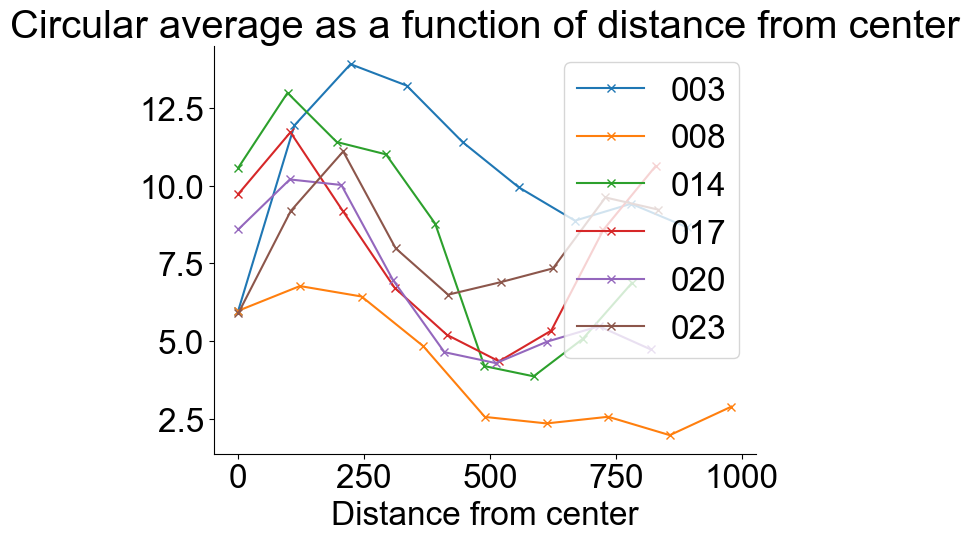

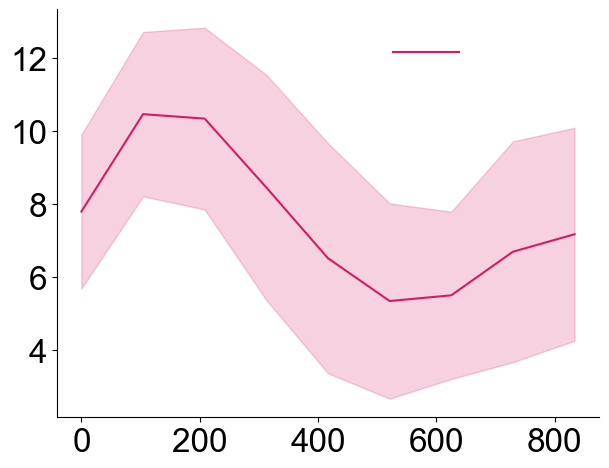

In [63]:
foldermutant=sorted(glob("H:/PHD_data/Imaging_et_analysis/NikSD/2025/06_Jun/03062025_AblationsMutants/*/PIV/ASCII/"))
#foldermutant2="H:/PHD_data/Imaging_et_analysis/NikSD/2025/06_Jun/04062025_AblationsMutants2/"
dict={"003":6,"008":3,"014":1,"017":2,"020":0,"023":1}
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
mutmagpd=pd.DataFrame()
for i in tqdm(range(len(foldermutant))):
    folder=foldermutant[i]
    x,y,u,v,magnitude,directio=get_data(glob(folder+"*.txt")[dict[folder[-14:-11]]])
    central_x,central_y=get_central_point(folder)
    # Define distance ranges (you can adjust the number of ranges and the maximum radius)
    num_ranges = 10
    max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
    distances = np.linspace(0, max_radius, num_ranges)

    # Calculate circular mean direction for each distance range
    mean_directions = []
    mean_magnitudes = []
    for _ in range(num_ranges - 1):
        indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[_]) &
                        (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[_ + 1]))

        mean_magnitude = np.nanmean(magnitude[indices])
        mean_magnitudes.append(mean_magnitude)
    mutmagpd[i]=mean_magnitudes


    #plt.plot(distances[:-1], mean_directions, marker='o',label='direction')
    plt.plot(distances[:-1], mean_magnitudes, marker='x',label=folder[-14:-11])
    plt.xlabel('Distance from center')
    plt.ylabel('')
    plt.title('Circular average as a function of distance from center')
    plt.legend()
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.plot(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1),label="          ",color="#83bb03")
#plt.fill_between(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1)-cmagpd.iloc[:,1:].std(axis=1),cmagpd.iloc[:,1:].mean(axis=1)+cmagpd.iloc[:,1:].std(axis=1),color="#83bb03",alpha=0.3)
plt.plot(distances[:-1],mutmagpd.mean(axis=1),label="         ",color="#D51B66")
plt.fill_between(distances[:-1], mutmagpd.mean(axis=1)-mutmagpd.std(axis=1), mutmagpd.mean(axis=1)+mutmagpd.std(axis=1), alpha=0.2,color="#D51B66")
plt.legend(frameon=False,loc="upper right",fontsize=24)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.svg",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.show()


  0%|          | 0/6 [00:00<?, ?it/s]

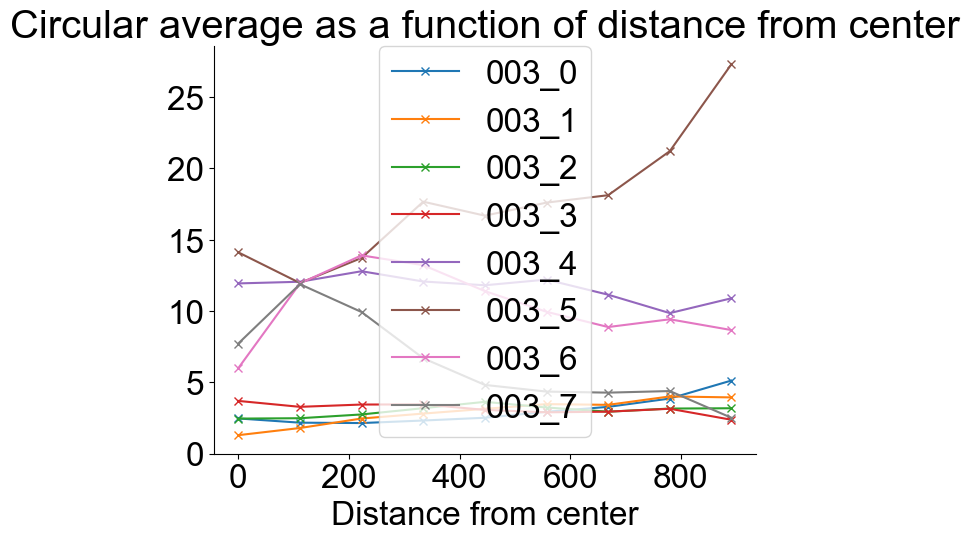

 17%|█▋        | 1/6 [00:00<00:02,  1.98it/s]

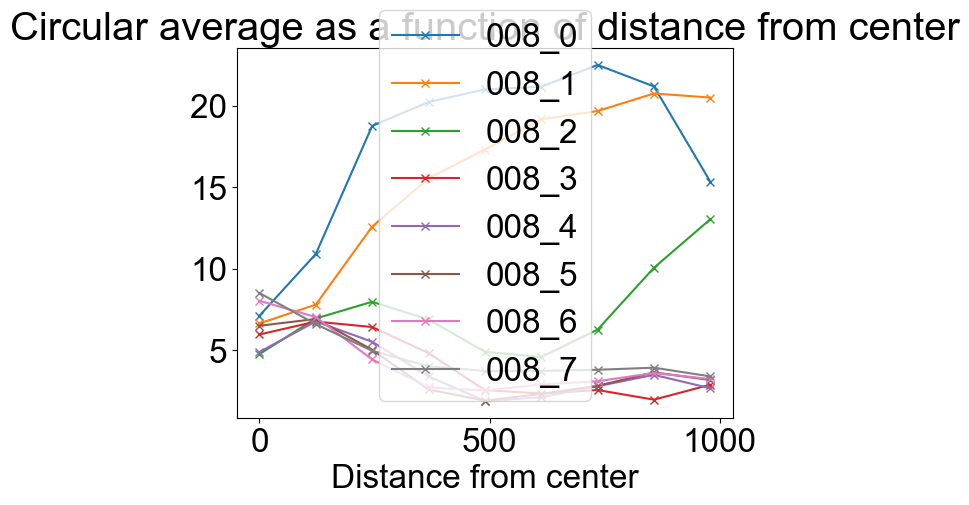

 33%|███▎      | 2/6 [00:01<00:02,  1.82it/s]

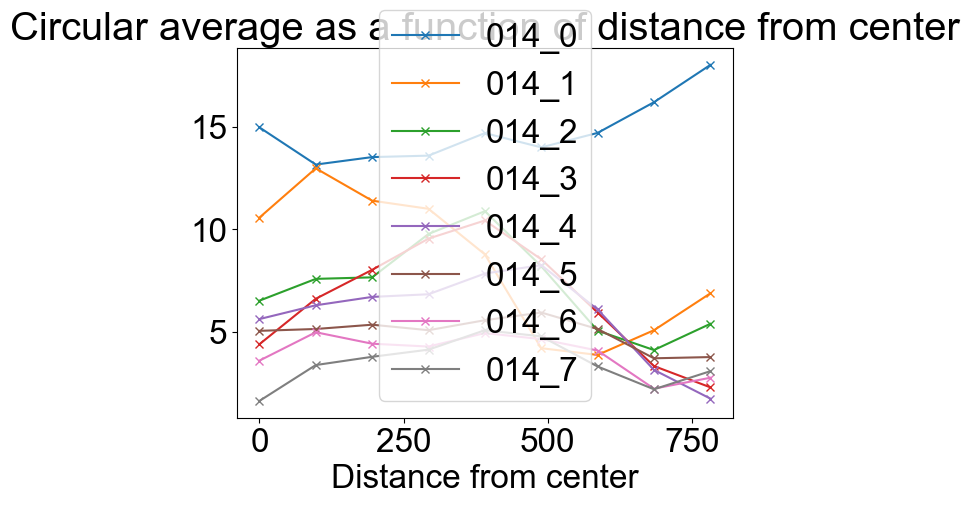

 50%|█████     | 3/6 [00:01<00:01,  1.89it/s]

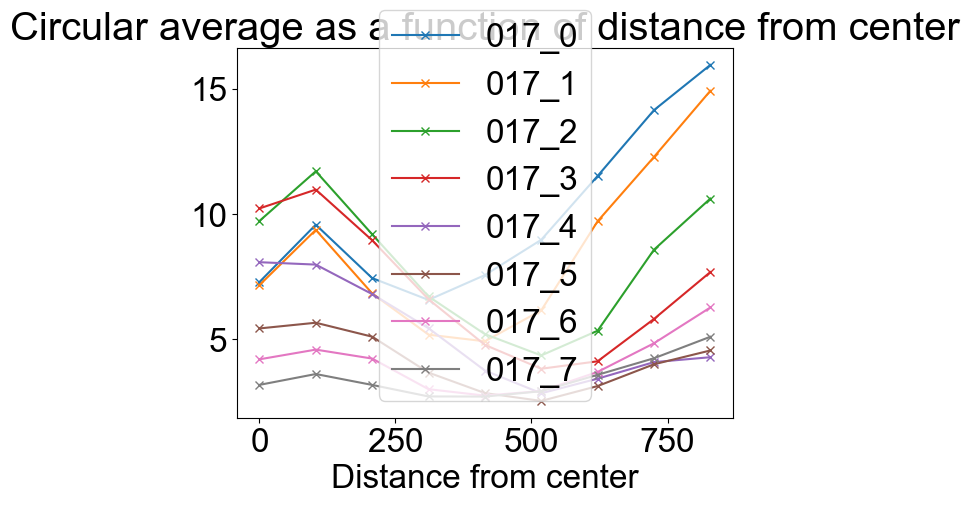

 67%|██████▋   | 4/6 [00:02<00:01,  1.64it/s]

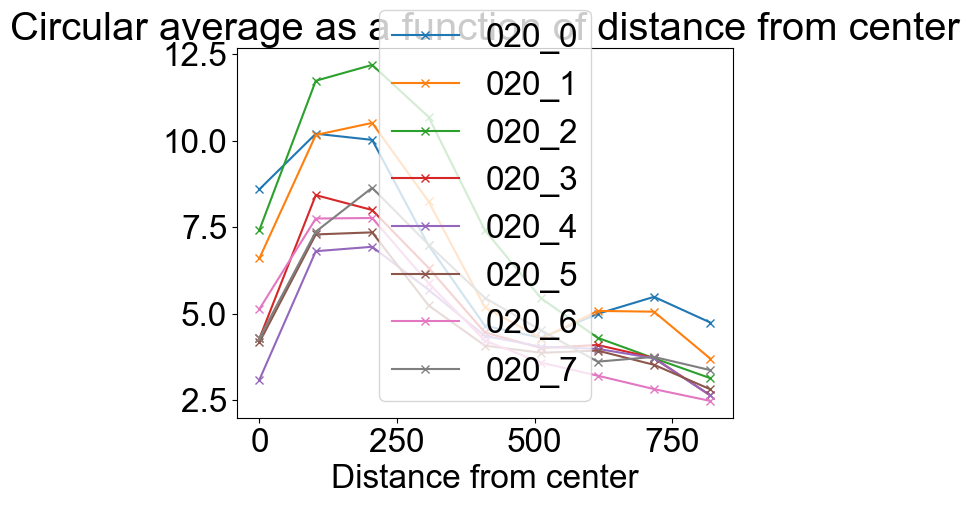

 83%|████████▎ | 5/6 [00:02<00:00,  1.81it/s]

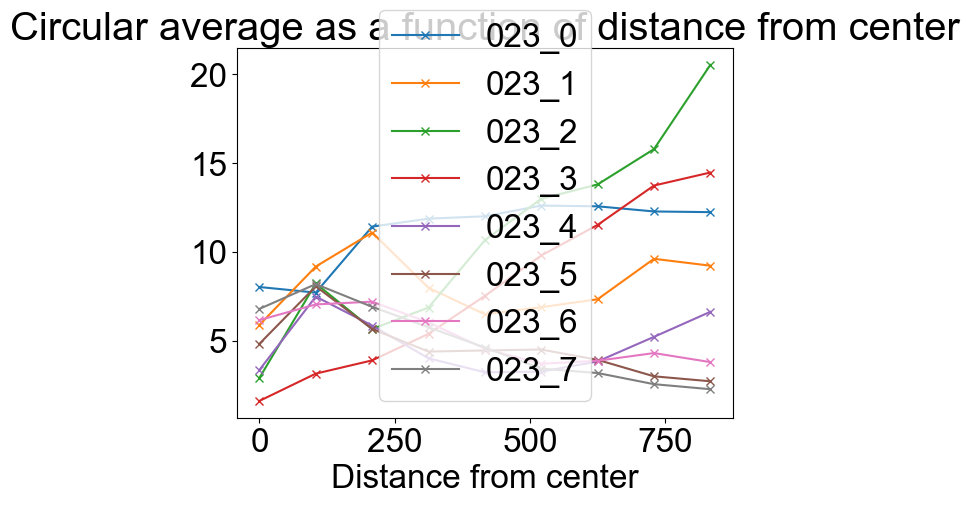

100%|██████████| 6/6 [00:03<00:00,  1.87it/s]


In [64]:
foldermutant=sorted(glob("H:/PHD_data/Imaging_et_analysis/NikSD/2025/06_Jun/03062025_AblationsMutants/*/PIV/ASCII/"))
#foldermutant2="H:/PHD_data/Imaging_et_analysis/NikSD/2025/06_Jun/04062025_AblationsMutants2/"
dict={"003":6,"008":3,"014":1,"017":2,"020":0,"023":1}
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
mutmagpd=pd.DataFrame()
for folder in [foldermutant]:
    for i in tqdm(range(len(foldermutant))):
        folder=foldermutant[i]
        for enu,file in enumerate(glob(folder+"*.txt")):
            x,y,u,v,magnitude,directio=get_data(file)
            central_x,central_y=get_central_point(folder)
            num_ranges = 10
            max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
            distances = np.linspace(0, max_radius, num_ranges)
            # Calculate circular mean direction for each distance range
            mean_directions = []
            mean_magnitudes = []
            for _ in range(num_ranges - 1):
                indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[_]) &
                                (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[_ + 1]))

                mean_magnitude = np.nanmean(magnitude[indices])
                mean_magnitudes.append(mean_magnitude)

        
            mutmagpd[i]=mean_magnitudes


            #plt.plot(distances[:-1], mean_directions, marker='o',label='direction')
            plt.plot(distances[:-1], mean_magnitudes, marker='x',label=foldermutant[i][-14:-11]+"_"+str(enu))
            plt.xlabel('Distance from center')
            plt.ylabel('')
            plt.title('Circular average as a function of distance from center')
            plt.legend()
            if enu==7:
                break
        plt.show()

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 5860.69it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/PIVlab_0001.txt


  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/PIVlab_0001.txt


  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<00:00, 8998.51it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII\PIVlab_0011.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/PIVlab_0001.txt


  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<00:00, 790.52it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/PIVlab_0001.txt


  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0018/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0018/PIV/ASCII\PIVlab_0001.txt
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0018/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs007008009/PIV/ASCII/ H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs007008009/PIV/ASCII\PIVlab_0001.txt


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs007008009/PIV/ASCII/PIVlab_0001.txt


  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<?, ?it/s]


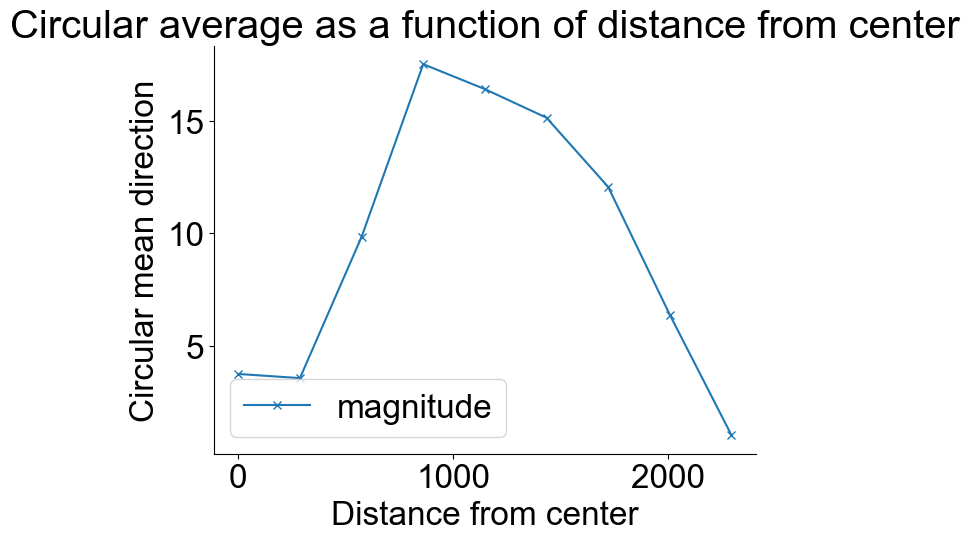

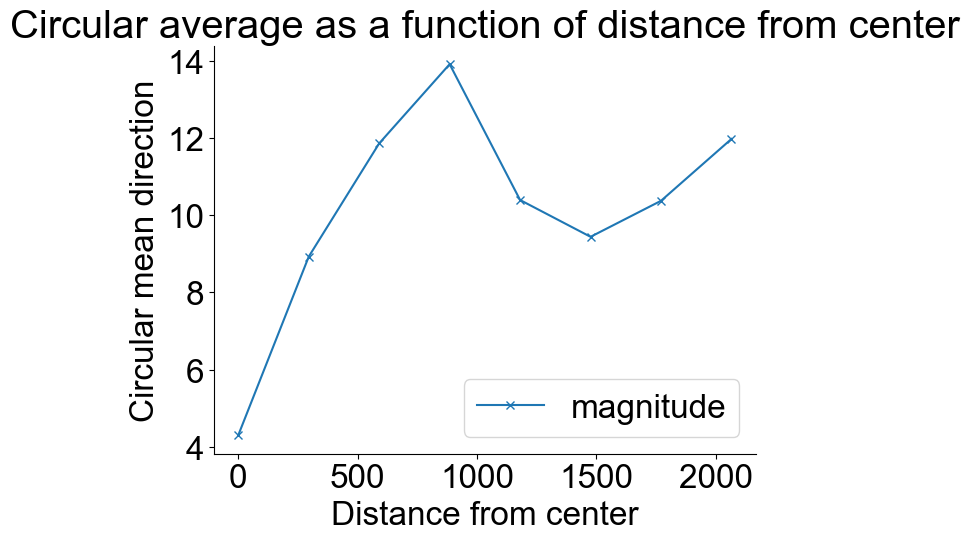

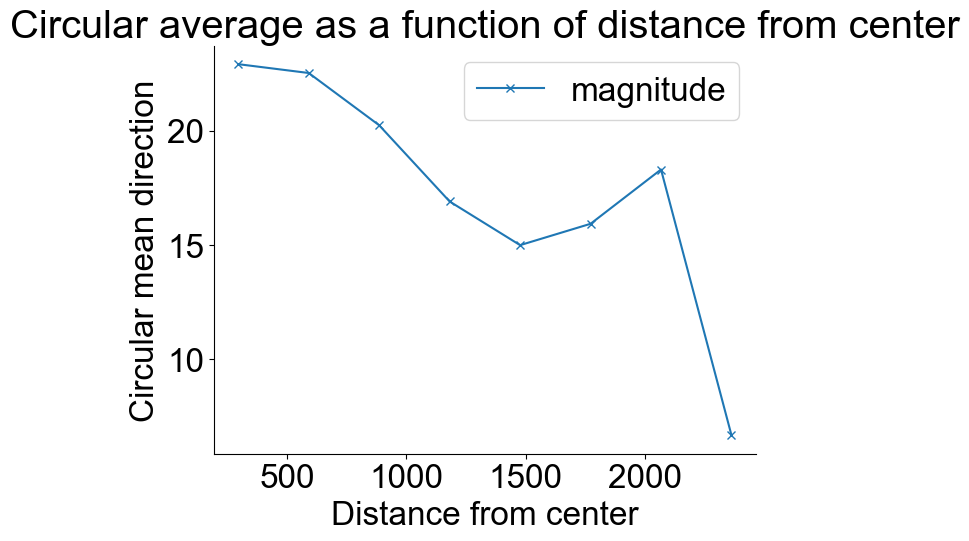

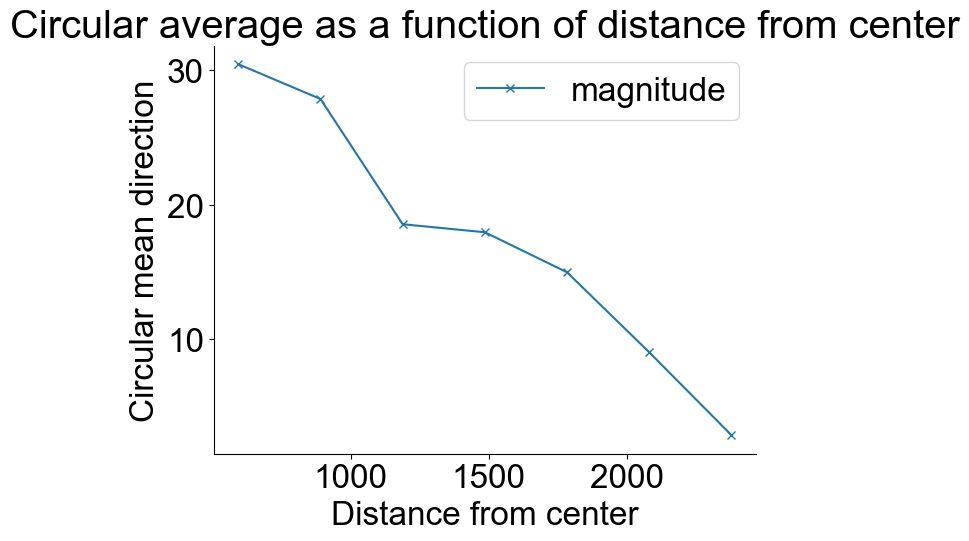

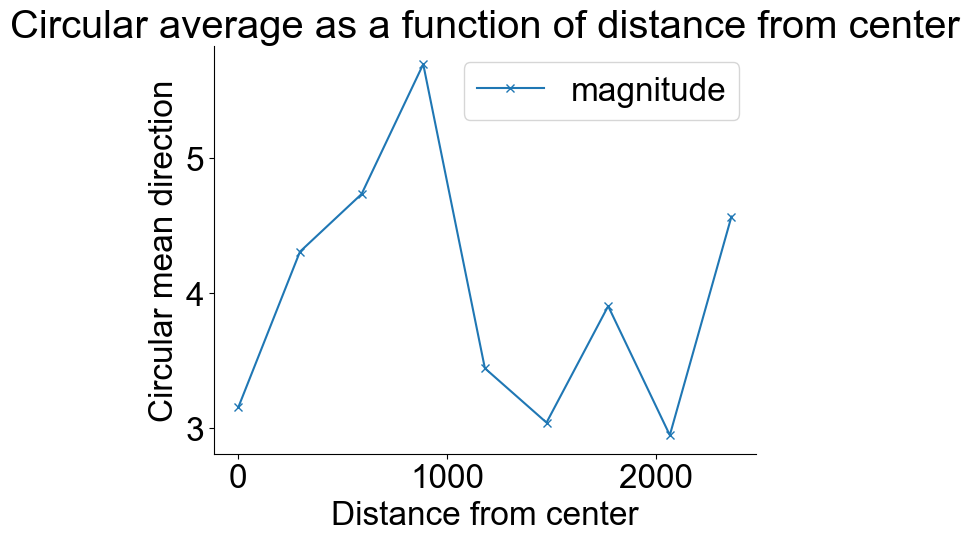

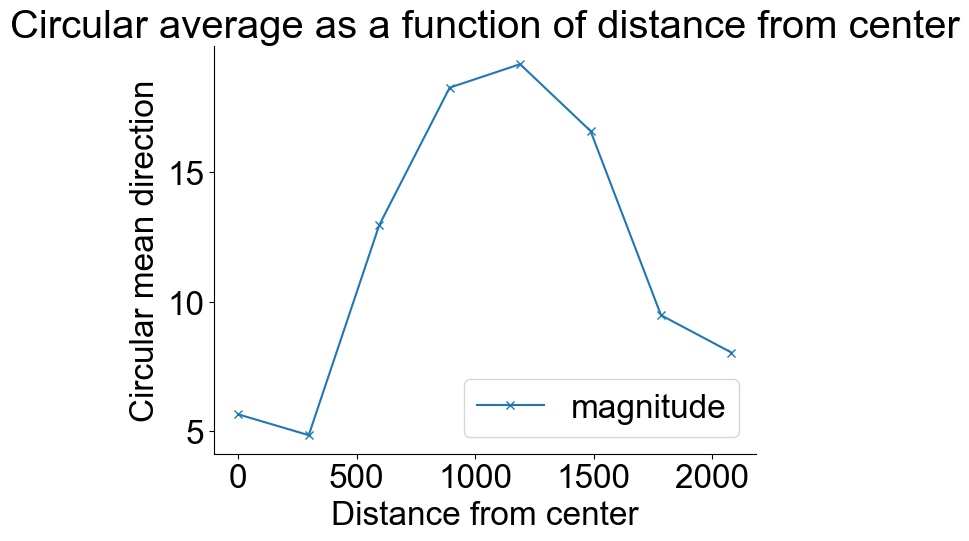

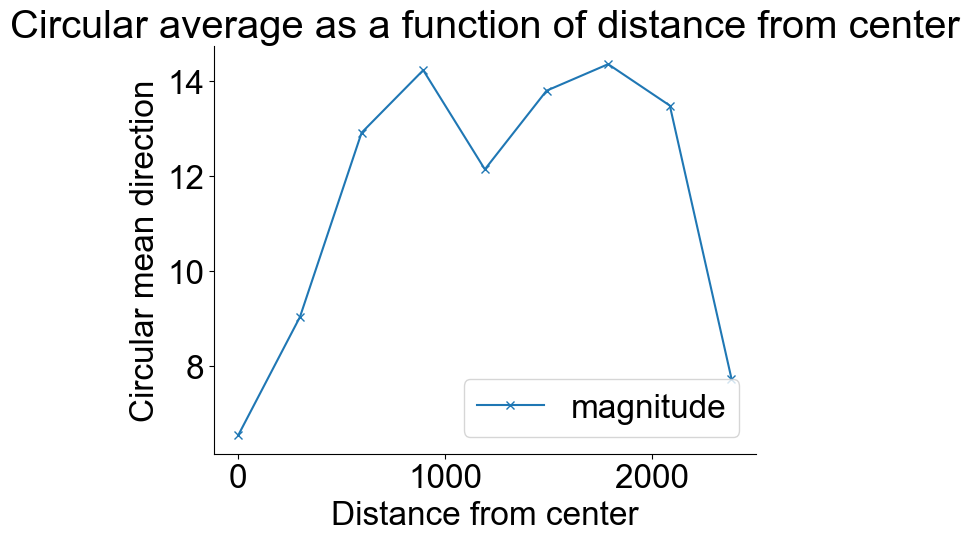

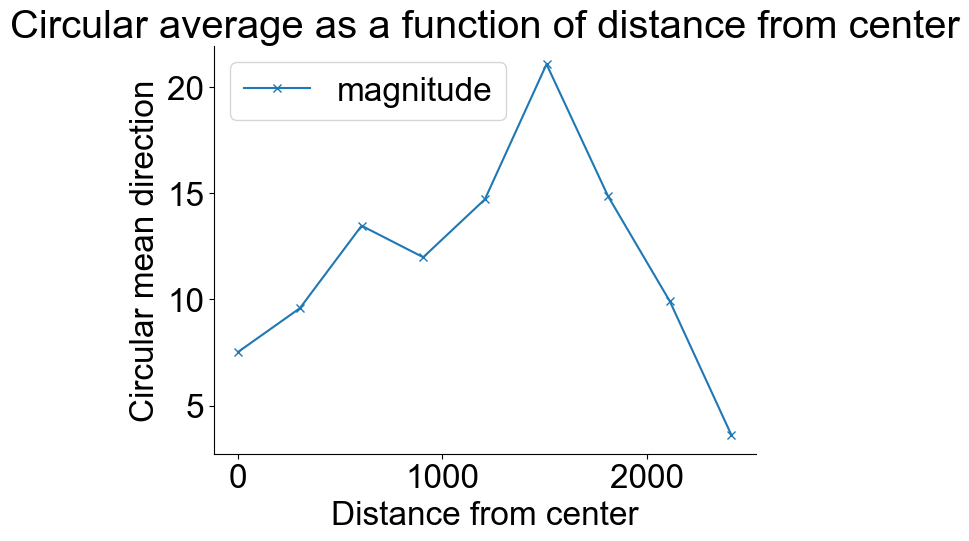

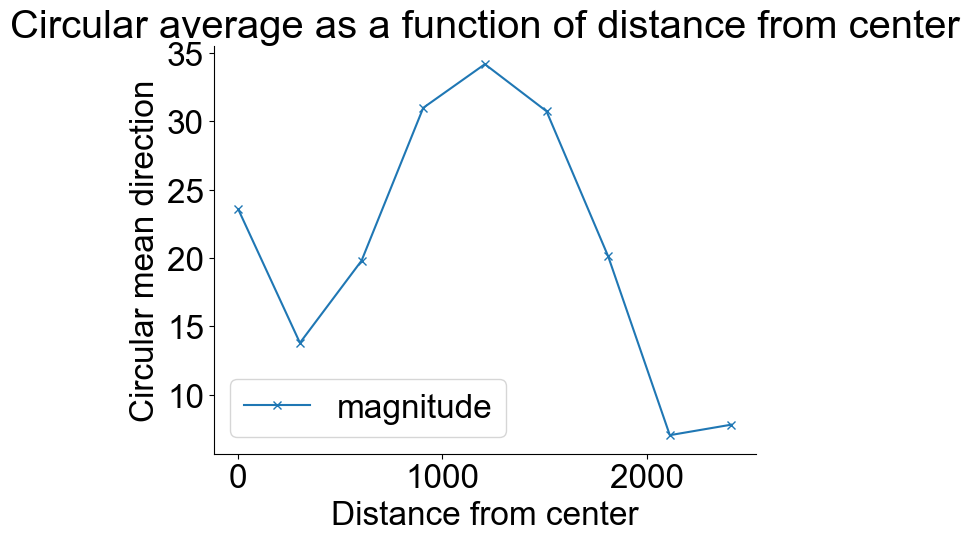

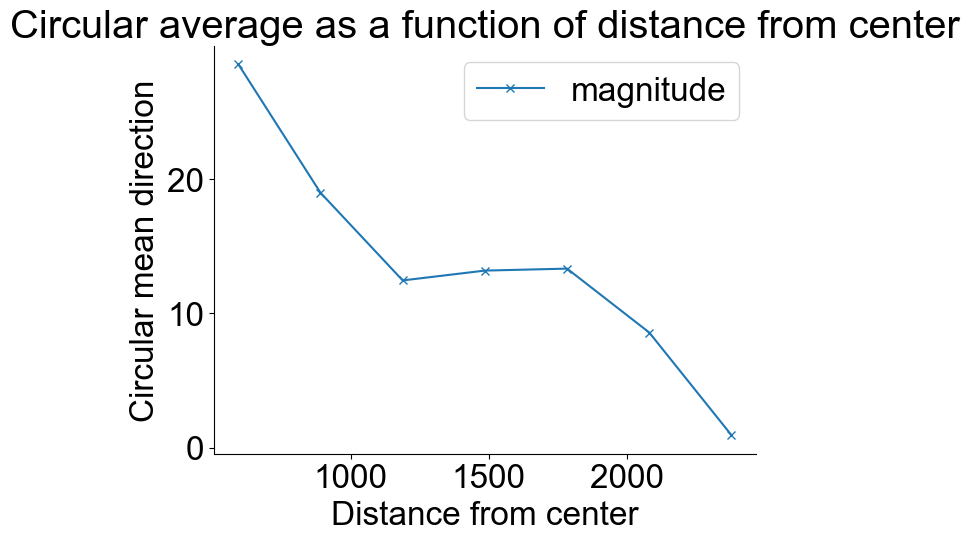

In [65]:
for folder in morphantfolderlist:
    print(folder,glob(folder+"*1.txt")[0])
    plotfrstddist(folder)

  0%|          | 0/10 [00:00<?, ?it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 881.59it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 30%|███       | 3/10 [00:00<00:00, 27.83it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<00:00, 4496.04it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 4494.97it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 60%|██████    | 6/10 [00:00<00:00, 28.39it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0018/PIV/ASCII/PIVlab_0001.txt


 90%|█████████ | 9/10 [00:00<00:00, 21.83it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs007008009/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 10/10 [00:00<00:00, 20.49it/s]


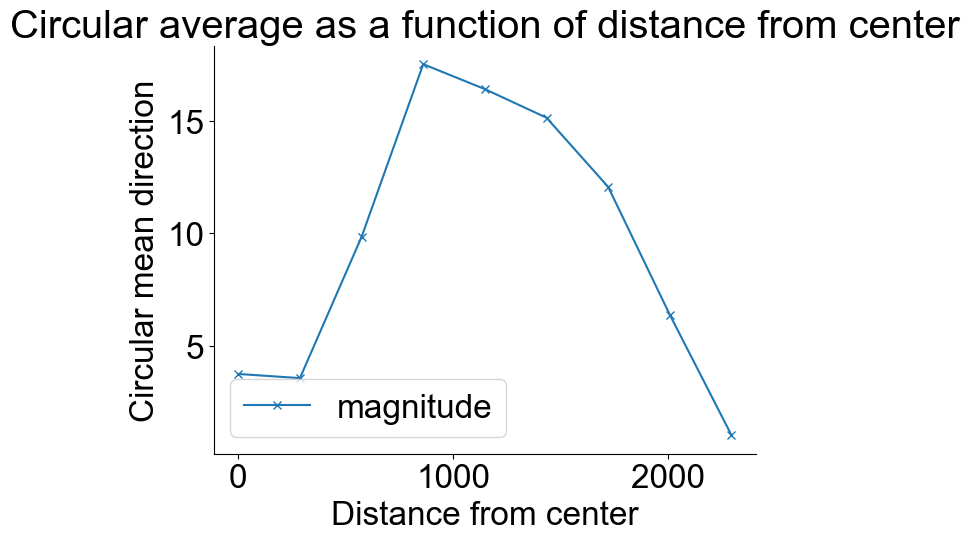

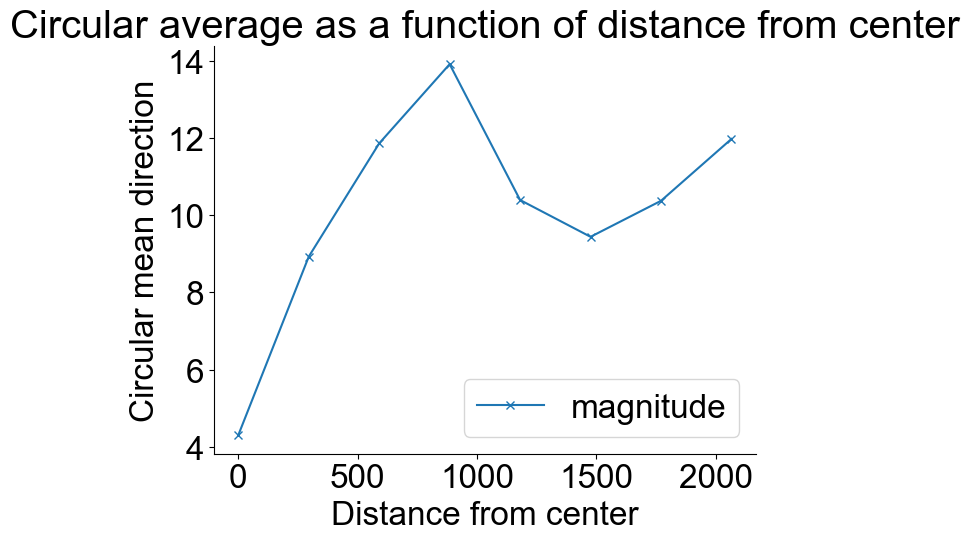

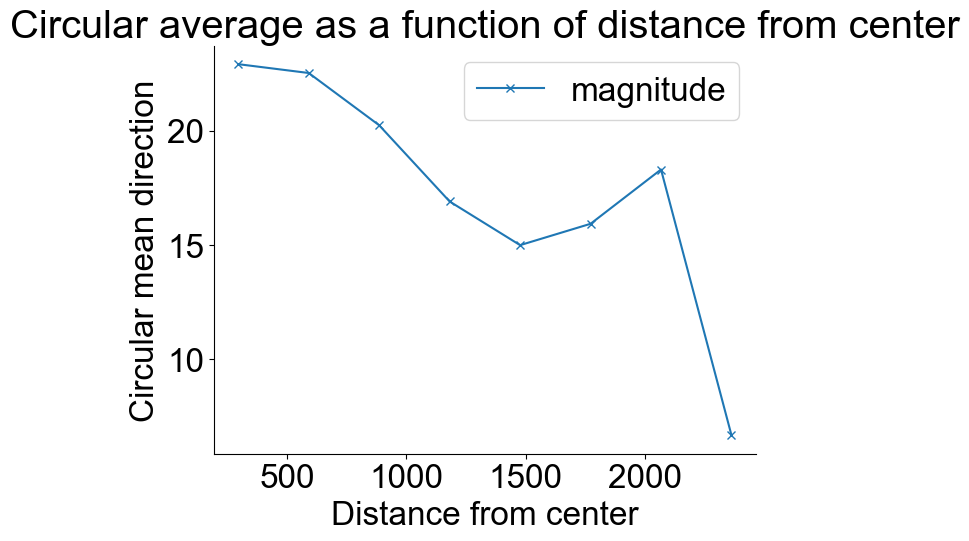

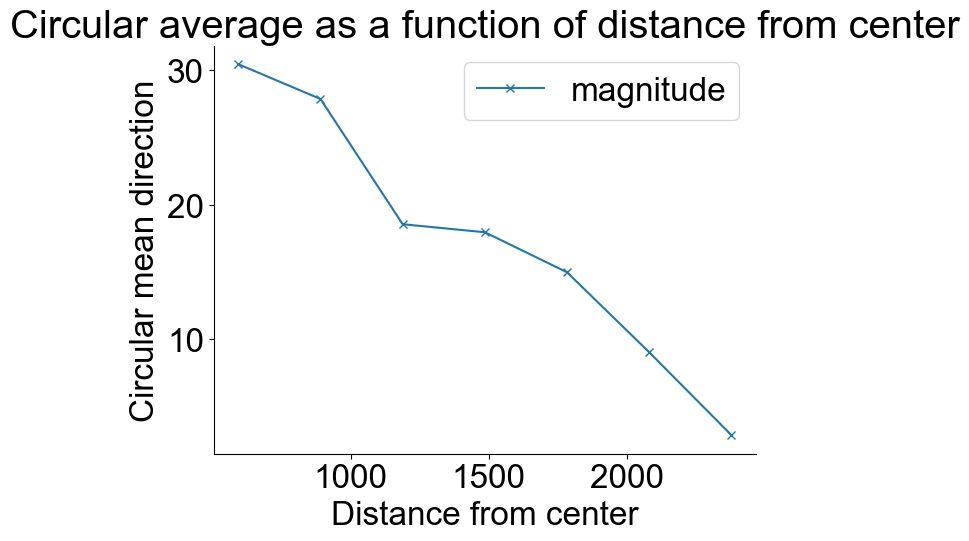

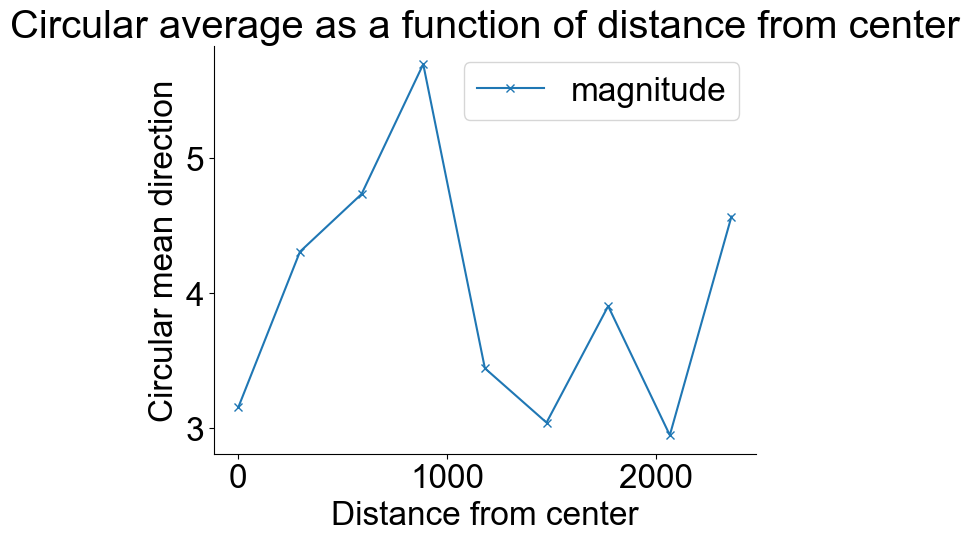

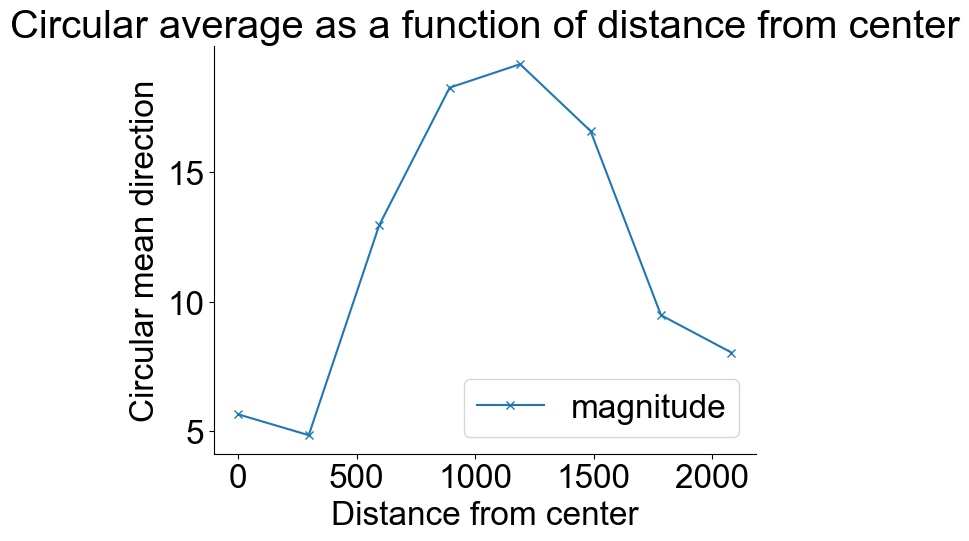

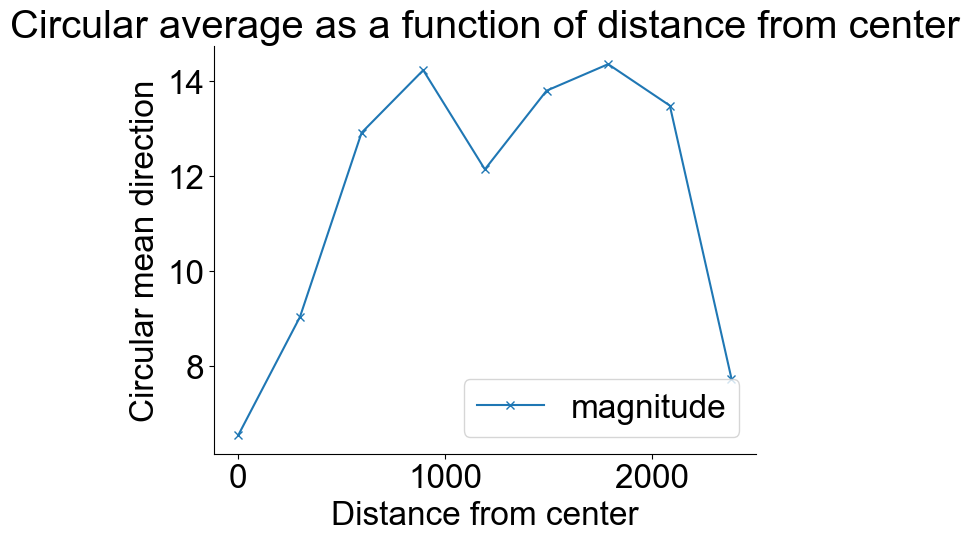

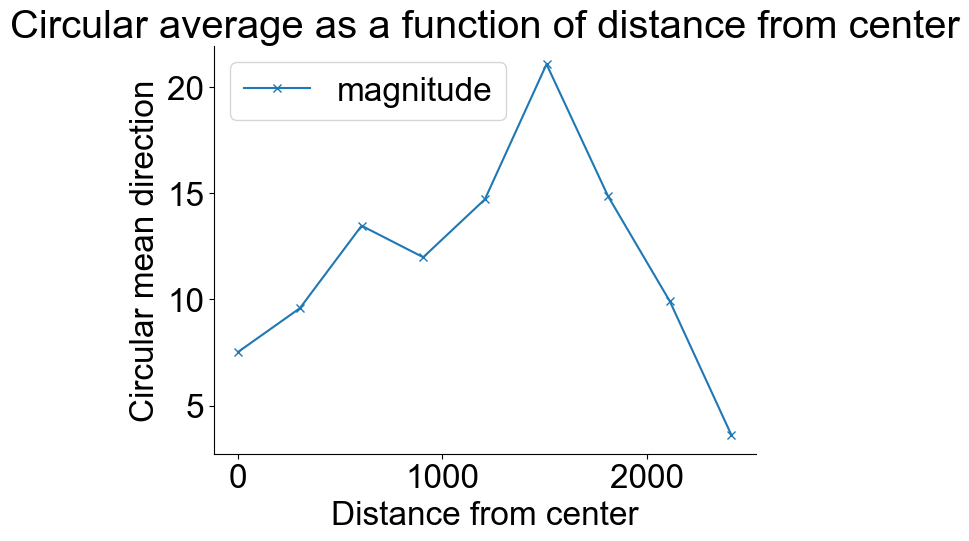

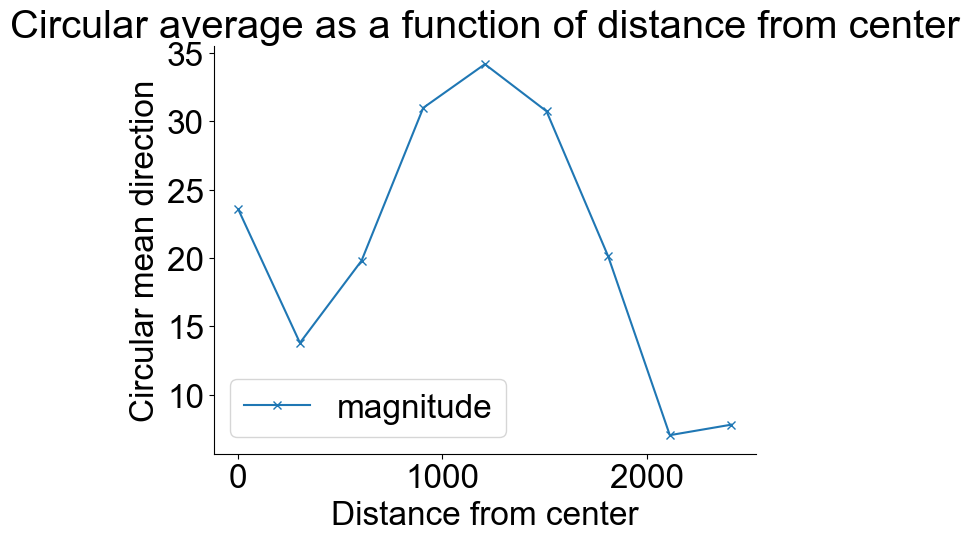

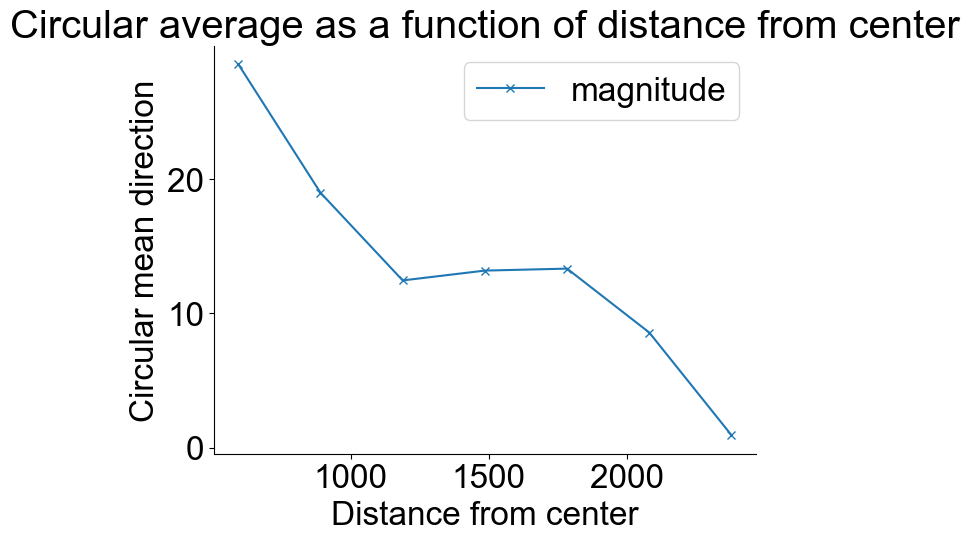

In [66]:
for folder in tqdm(morphantfolderlist):
    dis,mag=plotfrstddist(folder)
    dispd[folder]=dis
    magpd[folder]=mag

In [67]:
morphantfolderlist

['H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/',
 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/',
 'H:/PHD_data/Imaging_et

  0%|          | 0/10 [00:00<?, ?it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0002/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0004/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0006/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 30%|███       | 3/10 [00:00<00:00, 27.97it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0008/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
100%|██████████| 9/9 [00:00<00:00, 4112.51it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0011/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 4478.97it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0012/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
 60%|██████    | 6/10 [00:00<00:00, 25.24it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0016/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0018/PIV/ASCII/PIVlab_0001.txt


 90%|█████████ | 9/10 [00:00<00:00, 22.01it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs007008009/PIV/ASCII/PIVlab_0001.txt


C:\Users\snaik\AppData\Local\Temp\ipykernel_34904\3579890854.py:64: RuntimeWarning: Mean of empty slice
  mean_magnitude = np.nanmean(magnitude[indices])
  0%|          | 0/6 [00:00<?, ?it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs000/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 2919.24it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs001/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<00:00, 652.35it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs004/PIV/ASCII/PIVlab_0001.txt


 50%|█████     | 3/6 [00:00<00:00, 18.48it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs006/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 9/9 [00:00<?, ?it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs010/PIV/ASCII/PIVlab_0001.txt


 83%|████████▎ | 5/6 [00:00<00:00, 13.21it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs013/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 6/6 [00:00<00:00, 13.78it/s]


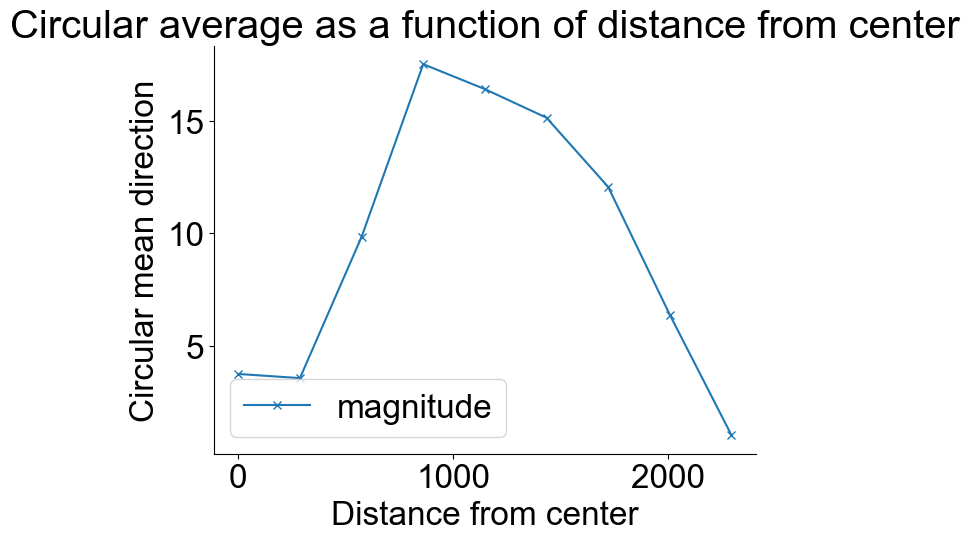

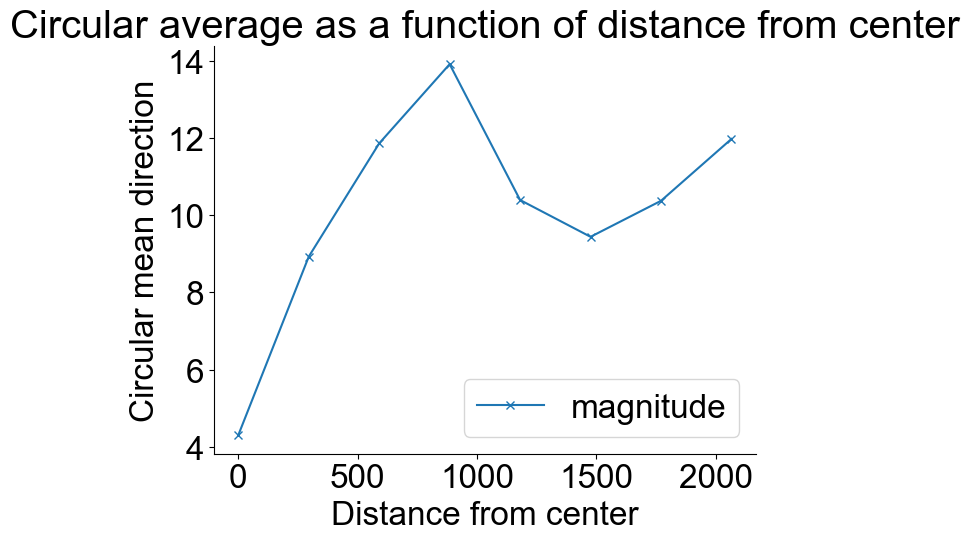

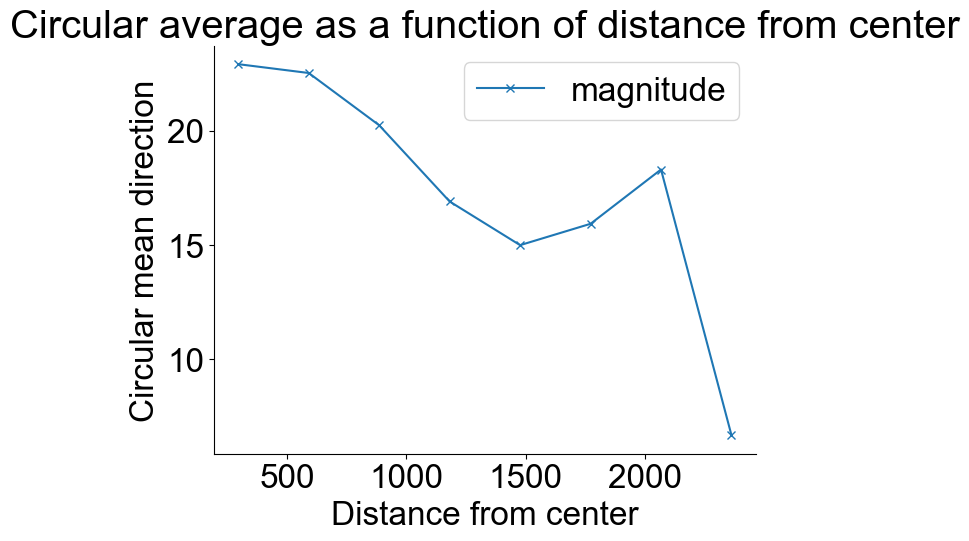

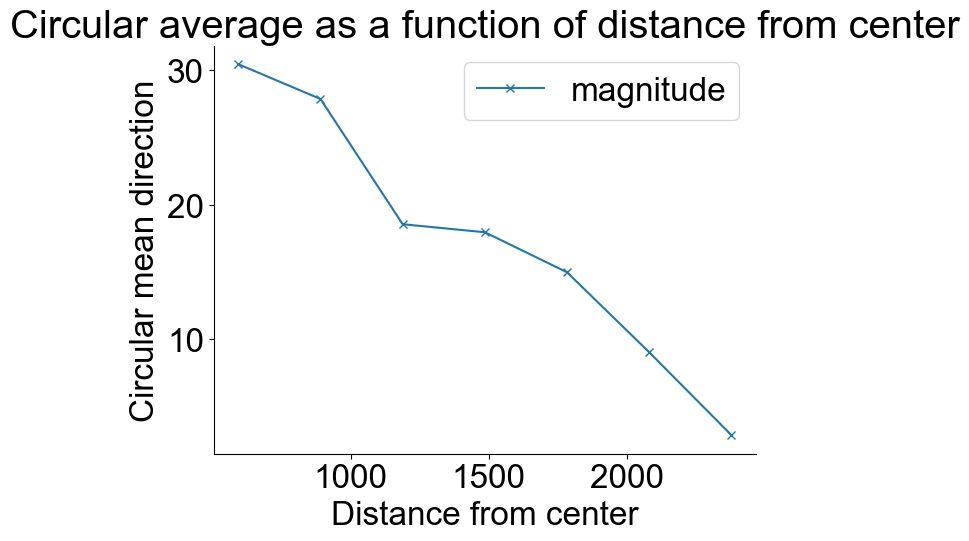

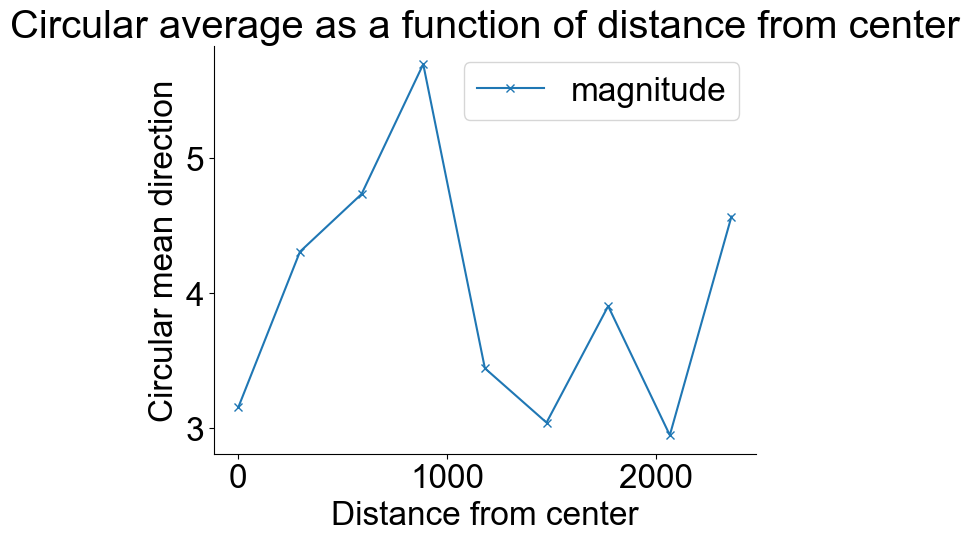

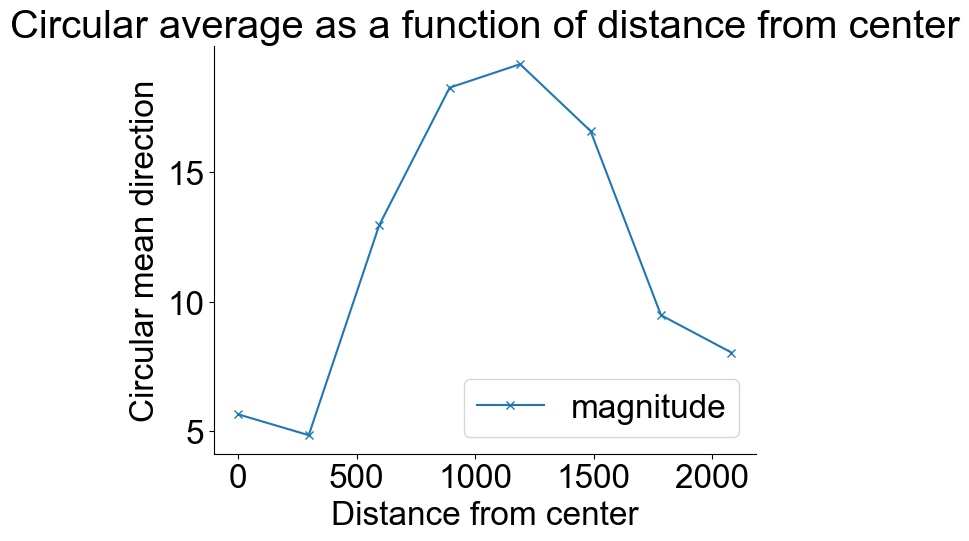

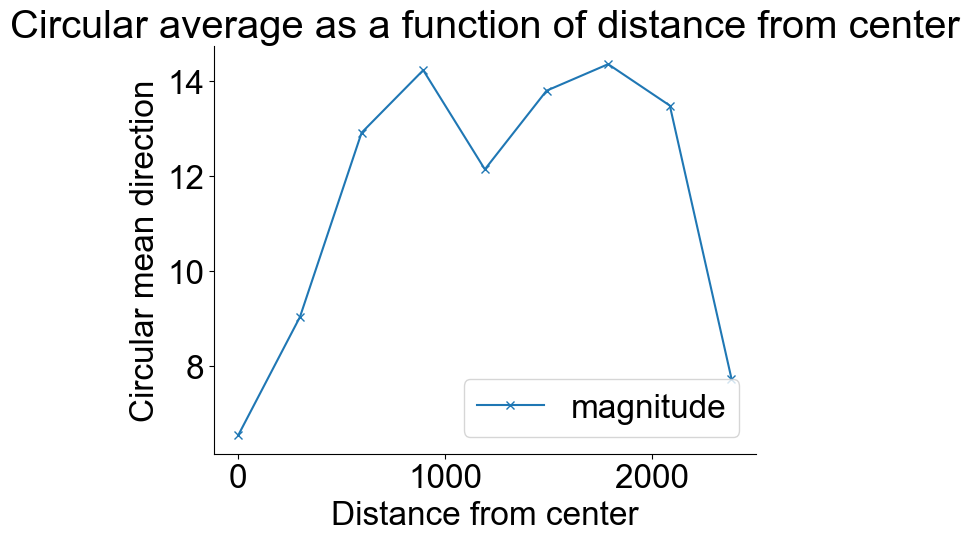

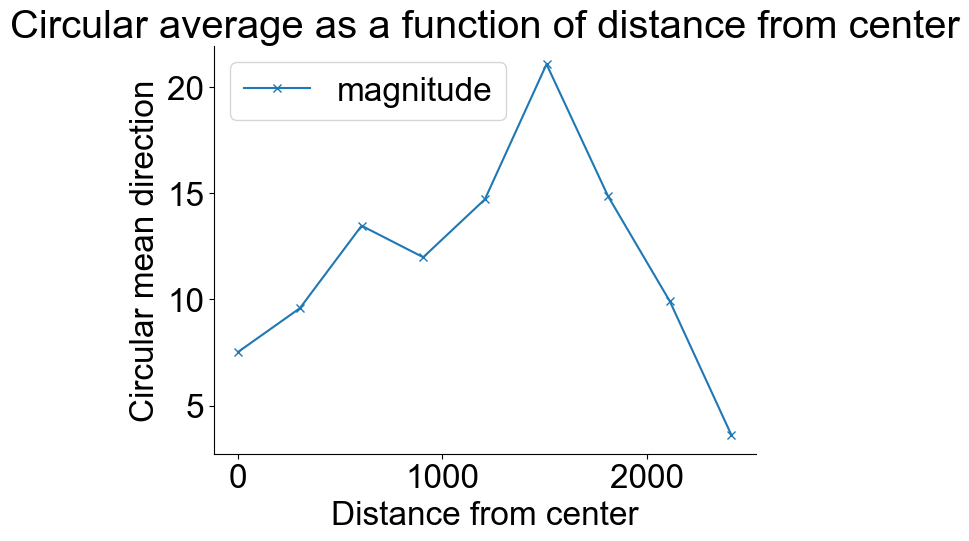

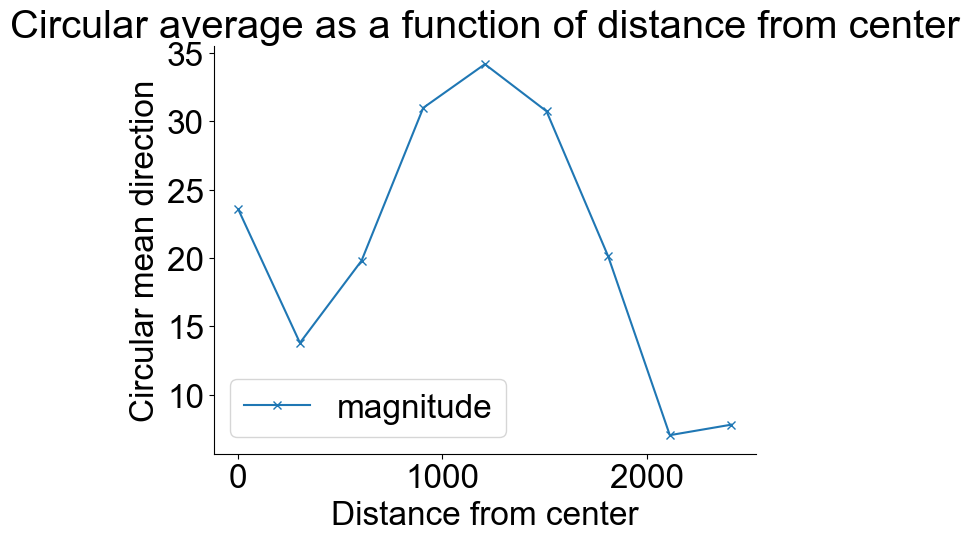

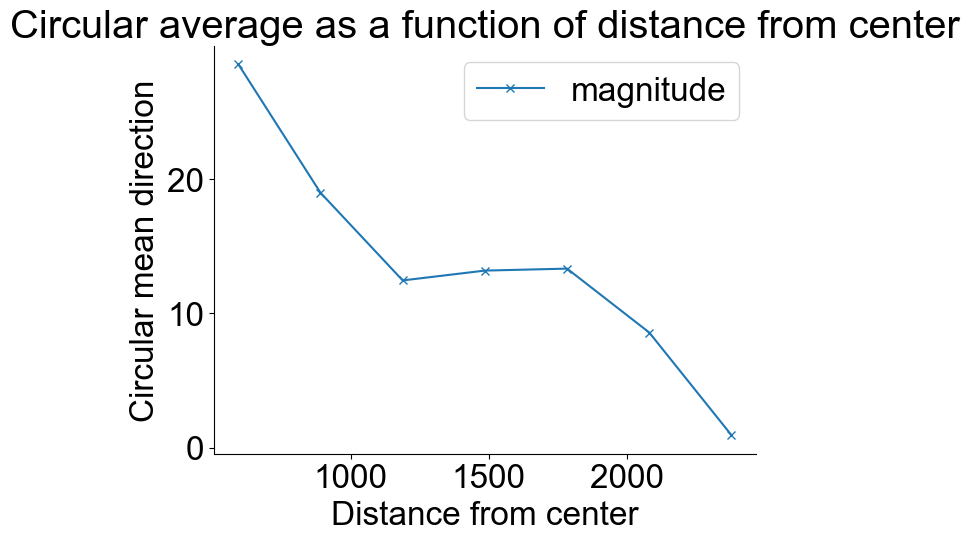

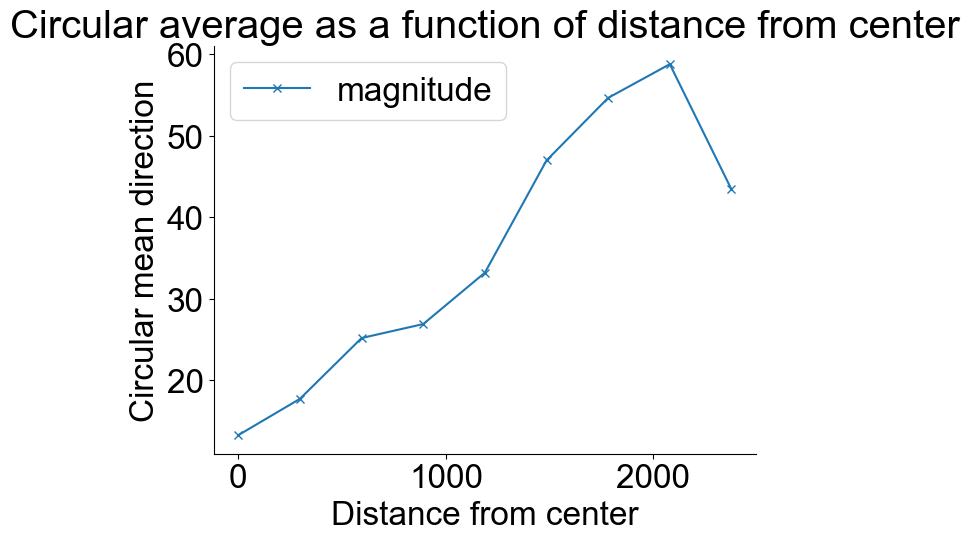

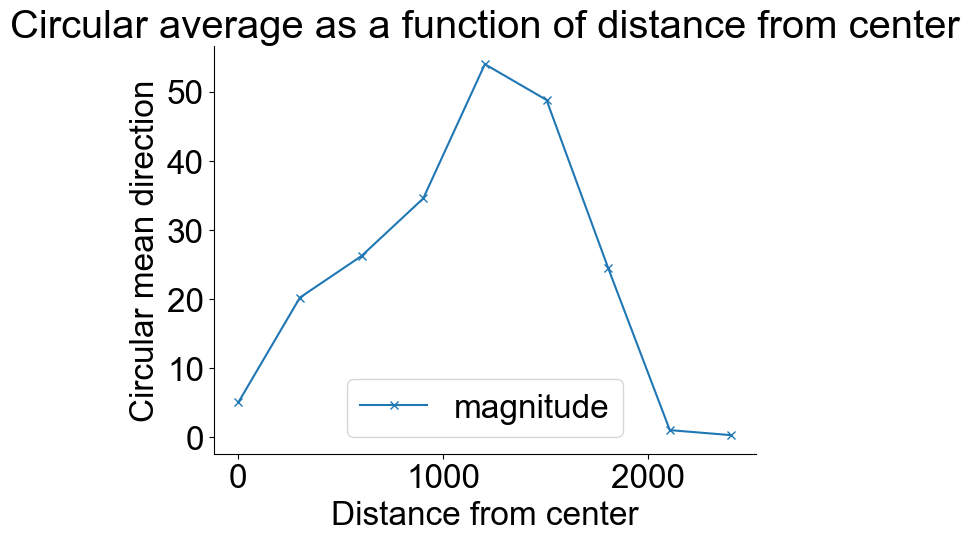

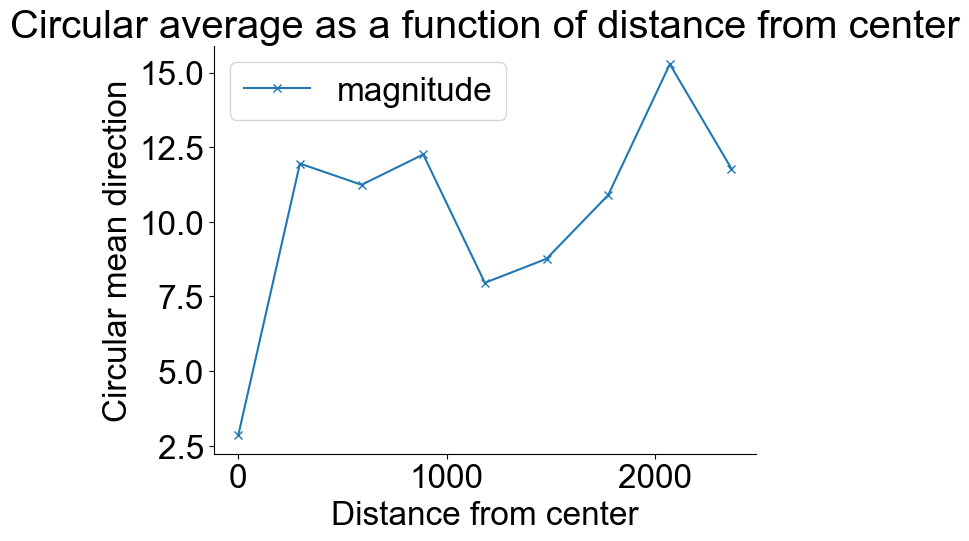

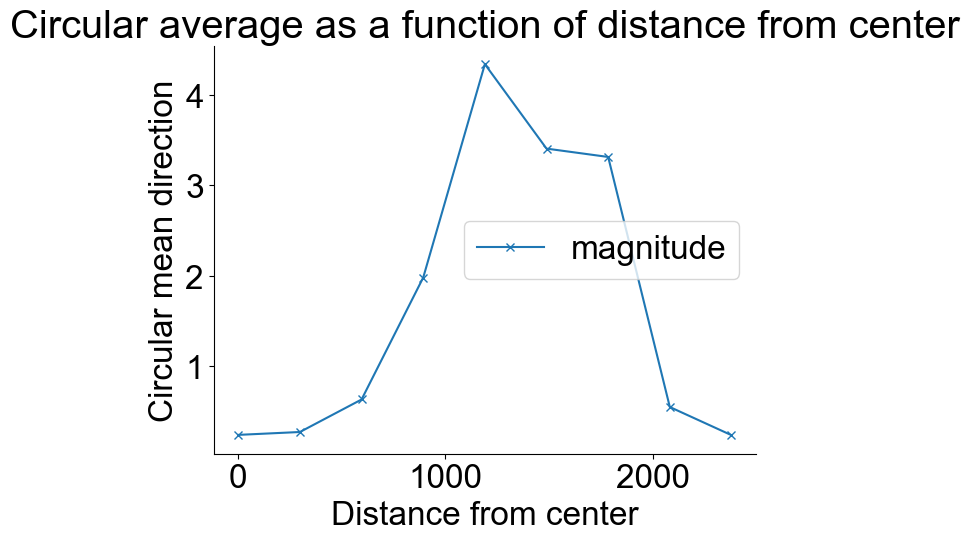

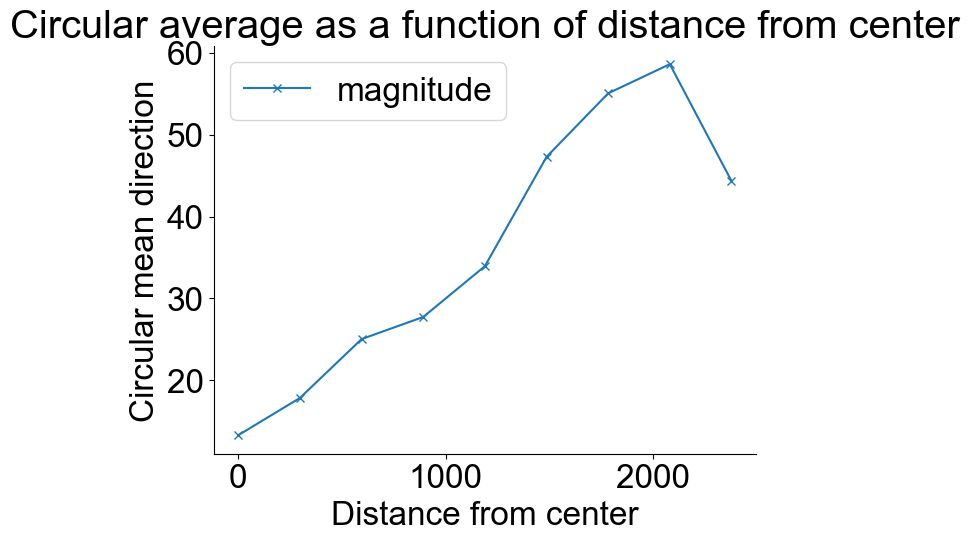

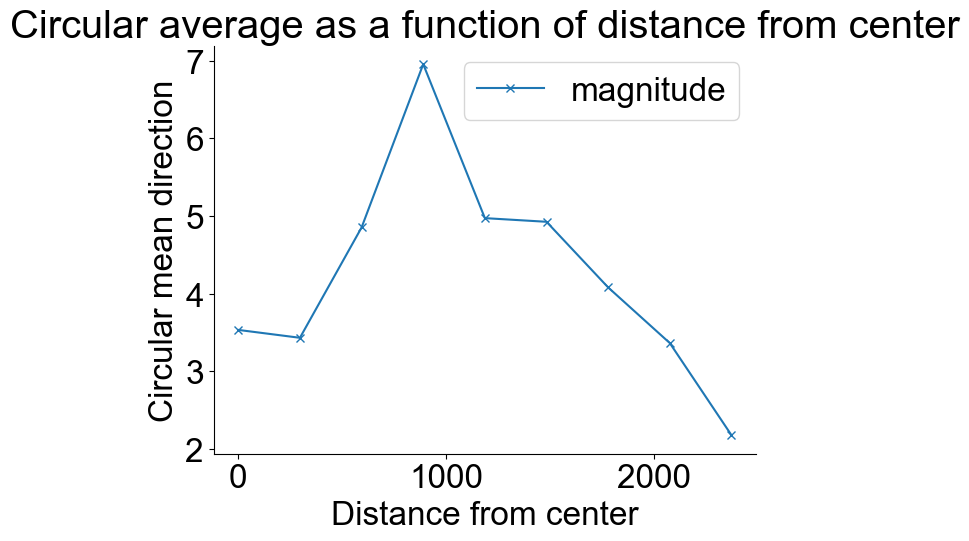

In [68]:
morphantfolderlist=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs*/PIV/ASCII/"))
morphantfolderlist2=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs*/PIV/ASCII/"))


dispd=pd.DataFrame()
magpd=pd.DataFrame()
cmagpd=pd.DataFrame()
for folder in tqdm(morphantfolderlist):
    dis,mag=plotfrstddist(folder)
    dispd[folder]=dis
    magpd[folder]=mag
for folder in tqdm(morphantfolderlist2):
    dis,mag=plotfrstddist(folder)
    dispd[folder]=dis
    magpd[folder]=mag

#dispd.to_csv("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/Displacement.csv")
#magpd.to_csv("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/Magnitude.csv")
#cmagpd.to_csv("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/Magnitude.csv")

  0%|          | 0/4 [00:00<?, ?it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/TimeSrs02021/PIV/ASCII/PIVlab_0001.txt


 25%|██▌       | 1/4 [00:00<00:00,  3.62it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs02021\PIV\ASCII\
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/TimeSrs022/PIV/ASCII/PIVlab_0001.txt


 50%|█████     | 2/4 [00:00<00:00,  4.57it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs022\PIV\ASCII\
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/TimeSrs02324/PIV/ASCII/PIVlab_0001.txt


 75%|███████▌  | 3/4 [00:00<00:00,  4.74it/s]

H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs02324\PIV\ASCII\
H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/TimeSrs025/PIV/ASCII/PIVlab_0001.txt


100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs025\PIV\ASCII\


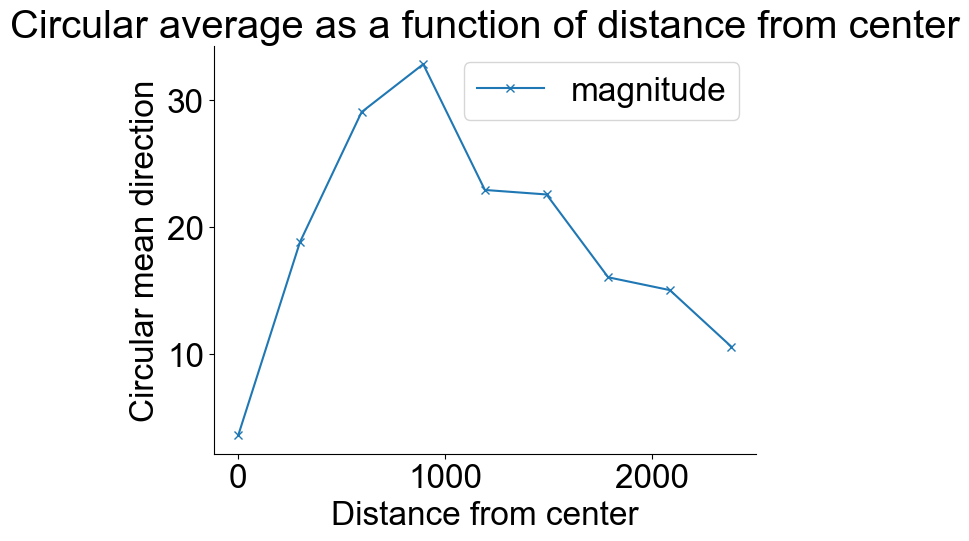

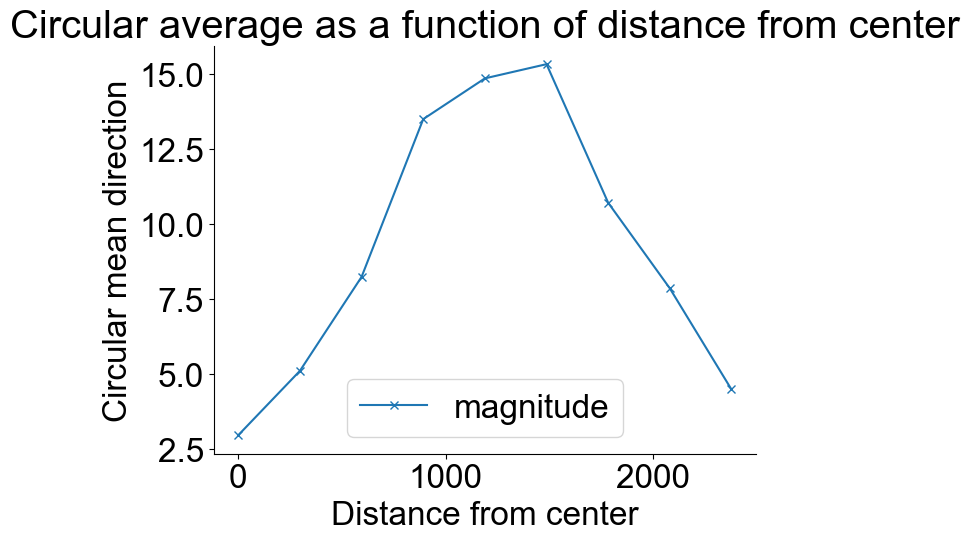

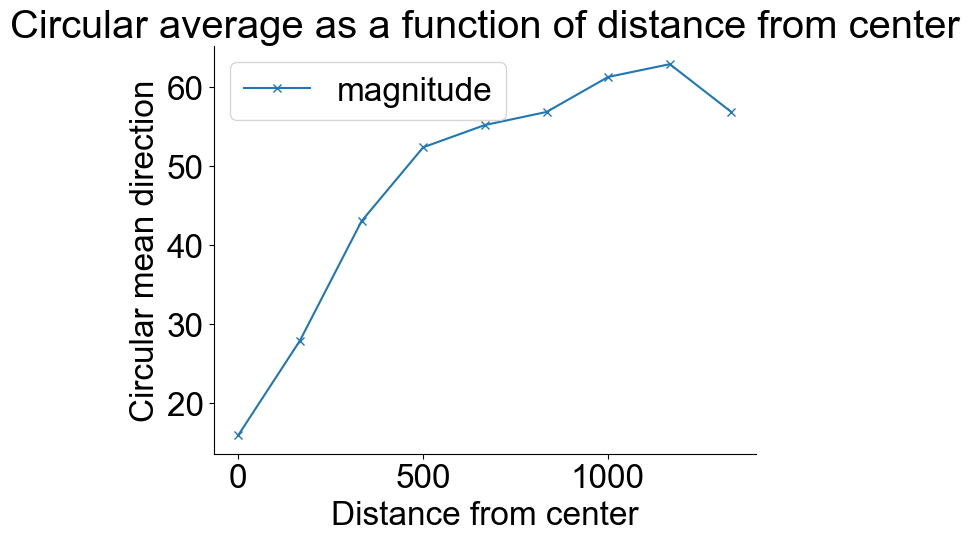

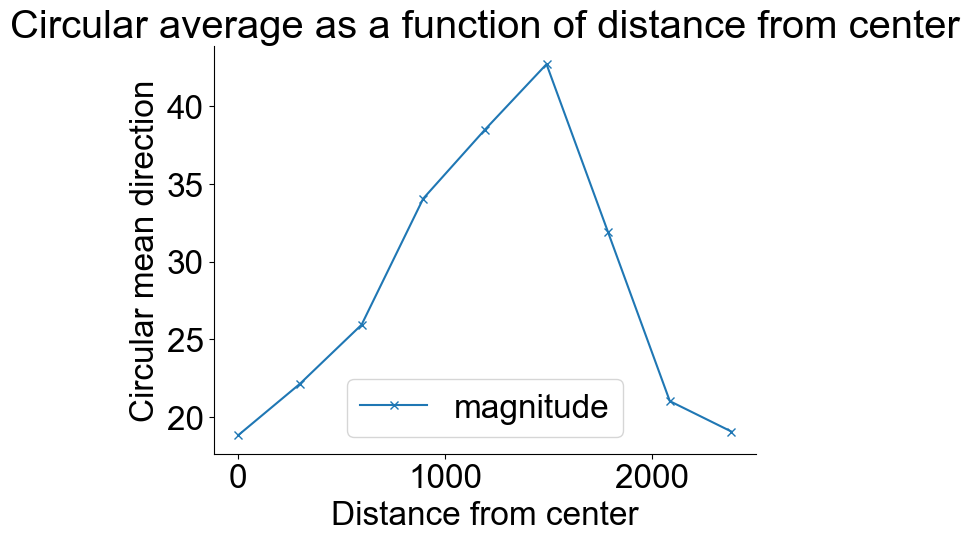

In [69]:
controlfolderlist=sorted(glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/Timesrs*/PIV/ASCII/"))
cmagpd=pd.DataFrame()
for folder in tqdm(controlfolderlist):
    dis,mag=plotfrstddist(folder)
    print(folder)
    cmagpd[folder]=mag

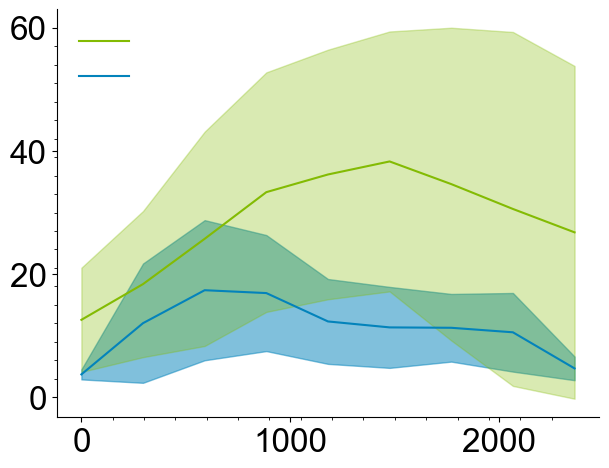

In [71]:
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.yticks(np.arange(0, 60, step=3),minor=True)
plt.xticks(np.arange(0, 2400, step=150),minor=True)

plt.plot(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1),label="          ",color="#83bb03")
plt.plot(dispd.iloc[:,1],magpd.iloc[:,1:5].mean(axis=1),label="                    ",color="#0383bb")
plt.fill_between(dispd.iloc[:,1],magpd.iloc[:,1:5].mean(axis=1)-magpd.iloc[:,1:5].std(axis=1),magpd.iloc[:,1:5].mean(axis=1)+magpd.iloc[:,1:5].std(axis=1),alpha=0.5,color="#0383bb")
plt.fill_between(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1)-cmagpd.iloc[:,1:].std(axis=1),cmagpd.iloc[:,1:].mean(axis=1)+cmagpd.iloc[:,1:].std(axis=1),color="#83bb03",alpha=0.3)
fig4folder="H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\PIVtissueflow"
plt.legend(loc='upper left',frameon=False,fontsize=18)
plt.savefig(fig4folder+"/Control.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig(fig4folder+"/Control.svg",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig(fig4folder+"/Control.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.show()

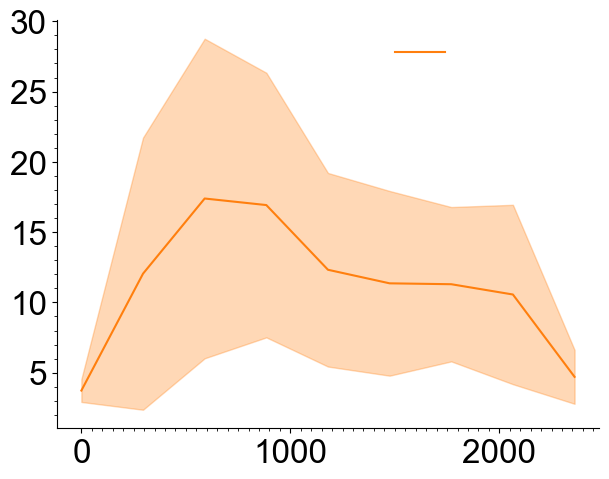

In [18]:
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.yticks(np.arange(0,30, step=1),minor=True)
plt.xticks(np.arange(0, 2500, step=50),minor=True)
#plt.plot(magpd.mean(axis=1))
plt.plot(dispd.iloc[:,1],magpd.iloc[:,1:5].mean(axis=1),label="                ",color="#ff7f0e")
#plt.fill_between(magpd.mean(axis=1).index,magpd.mean(axis=1)-magpd.std(axis=1),magpd.mean(axis=1)+magpd.std(axis=1),alpha=0.5)
plt.fill_between(dispd.iloc[:,1],magpd.iloc[:,1:5].mean(axis=1)-magpd.iloc[:,1:5].std(axis=1),magpd.iloc[:,1:5].mean(axis=1)+magpd.iloc[:,1:5].std(axis=1),color="#ff7f0e",alpha=0.3)
fig4folder="H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure4\PIVtissueflow"
plt.legend(loc="upper right",frameon=False,fontsize=18)
plt.savefig(fig4folder+"/K4K8MO.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig(fig4folder+"/K4K8MO.svg",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig(fig4folder+"/K4K8MO.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.show()

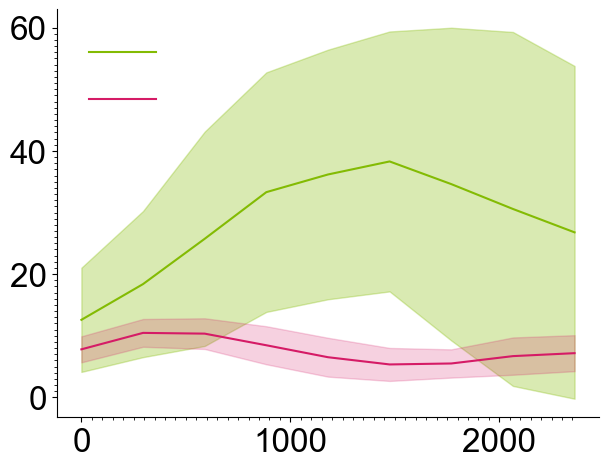

In [45]:
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.yticks(np.arange(0, 60, step=1),minor=True)
plt.xticks(np.arange(0, 2400, step=50),minor=True)
plt.plot(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1),label="          ",color="#83bb03")
plt.fill_between(dispd.iloc[:,1],cmagpd.iloc[:,1:].mean(axis=1)-cmagpd.iloc[:,1:].std(axis=1),cmagpd.iloc[:,1:].mean(axis=1)+cmagpd.iloc[:,1:].std(axis=1),color="#83bb03",alpha=0.3)
plt.plot(dispd.iloc[:,1],mutmagpd.mean(axis=1),label="            ",color="#D51B66")
plt.fill_between(dispd.iloc[:,1], mutmagpd.mean(axis=1)-mutmagpd.std(axis=1), mutmagpd.mean(axis=1)+mutmagpd.std(axis=1), alpha=0.2,color="#D51B66")
plt.legend(frameon=False,loc="upper left",bbox_to_anchor=(0.005,1),fontsize=24)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/FlowVelMutant.svg",bbox_inches='tight',pad_inches=0,transparent=True,dpi=300)
plt.show()

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0002\PIV\ASCII\


 10%|██████▎                                                        | 1/10 [01:41<15:16, 101.80s/it]

Done 1/10
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0004\PIV\ASCII\


 20%|████████████▌                                                  | 2/10 [03:33<14:21, 107.65s/it]

Done 2/10
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0006\PIV\ASCII\


 30%|██████████████████▉                                            | 3/10 [05:15<12:16, 105.26s/it]

Done 3/10
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0008\PIV\ASCII\


 30%|██████████████████▉                                            | 3/10 [05:21<12:31, 107.33s/it]


KeyboardInterrupt: 

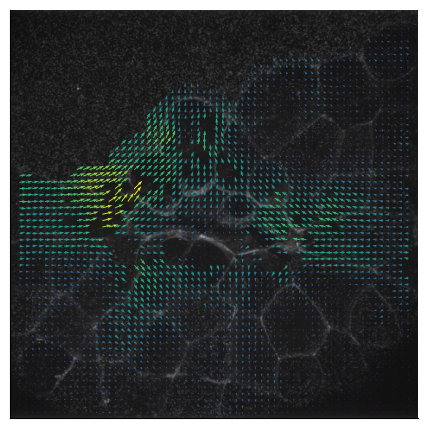

In [ ]:
morphantfolderlist=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs*/PIV/ASCII/")
morphantimagelist=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs*/CP/")
for i in tqdm(range(len(morphantimagelist))):
    print(f"Present folder: {morphantfolderlist[i]}")
    testfile=glob(morphantfolderlist[i]+"*.txt")
    testimages=glob(morphantimagelist[i]+"*.tif")
    for j in range(len(testfile)):
        plotimagequiver(testfile[j],plt.imread(testimages[j]),show=False)
    print(f"Done {i+1}/{len(morphantfolderlist)}")

In [12]:
morphantfolderlist2=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs*/PIV/ASCII/")
morphantimagelist2=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/TimeSrs*/CP/")
for i in tqdm(range(len(morphantimagelist2))):
    print(f"Present folder: {morphantfolderlist2[i]}")
    testfile=glob(morphantfolderlist2[i]+"*.txt")
    testimages=glob(morphantimagelist2[i]+"*.tif")
    for j in range(len(testfile)):
        plotimagequiver(testfile[j],plt.imread(testimages[j]),show=False)
    print(f"Done {i+1}/{len(morphantfolderlist2)}")

  0%|          | 0/6 [00:00<?, ?it/s]

Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs000\PIV\ASCII\


 17%|█▋        | 1/6 [01:12<06:03, 72.64s/it]

Done 1/6
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs001\PIV\ASCII\


 33%|███▎      | 2/6 [02:32<05:08, 77.03s/it]

Done 2/6
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs004\PIV\ASCII\


 50%|█████     | 3/6 [03:06<02:52, 57.35s/it]

Done 3/6
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs006\PIV\ASCII\


 67%|██████▋   | 4/6 [04:18<02:06, 63.26s/it]

Done 4/6
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs010\PIV\ASCII\


 83%|████████▎ | 5/6 [05:36<01:08, 68.39s/it]

Done 5/6
Present folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing\TimeSrs013\PIV\ASCII\


100%|██████████| 6/6 [06:55<00:00, 69.21s/it]

Done 6/6


  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/Quiver/'

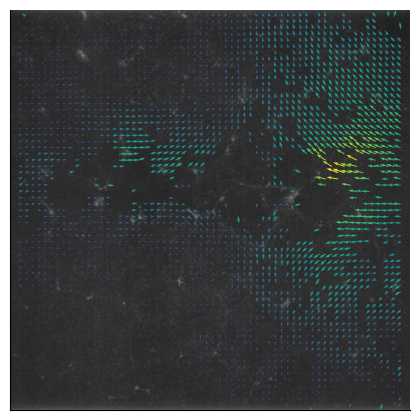

In [ ]:
morphantshowfile=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/PIV/ASCII/"
+"*.txt")
morphantshowimage=glob("H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/TimeSrs0015/CP/"+"*.tif")
for mm in tqdm(range(len(morphantshowfile))):
    plotimagequiver(morphantshowfile[mm],plt.imread(morphantshowimage[mm+1]))
    print(mm)

In [14]:
np.mean(x)

1023.0

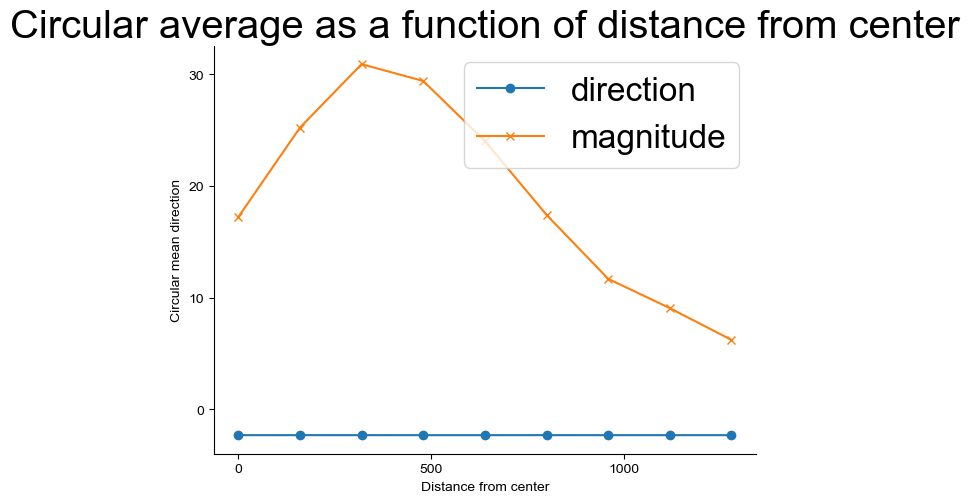

In [12]:
# Define distance ranges (you can adjust the number of ranges and the maximum radius)
num_ranges = 10
max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
distances = np.linspace(0, max_radius, num_ranges)

# Calculate circular mean direction for each distance range
mean_directions = []
mean_magnitudes = []
for i in range(num_ranges - 1):
    indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[i]) &
                       (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[i + 1]))
    directions_relative = np.arctan2(v[indices] - central_y, u[indices] - central_x)
    mean_direction = np.mean(directions_relative)
    mean_directions.append(mean_direction)
    mean_magnitude = np.mean(magnitude[indices])
    mean_magnitudes.append(mean_magnitude)
# Visualize circular average as a function of distance

fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(distances[:-1], mean_directions, marker='o',label='direction')
plt.plot(distances[:-1], mean_magnitudes, marker='x',label='magnitude')
plt.xlabel('Distance from center')
plt.ylabel('Circular mean direction')
plt.title('Circular average as a function of distance from center')
plt.legend()
plt.show()

C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


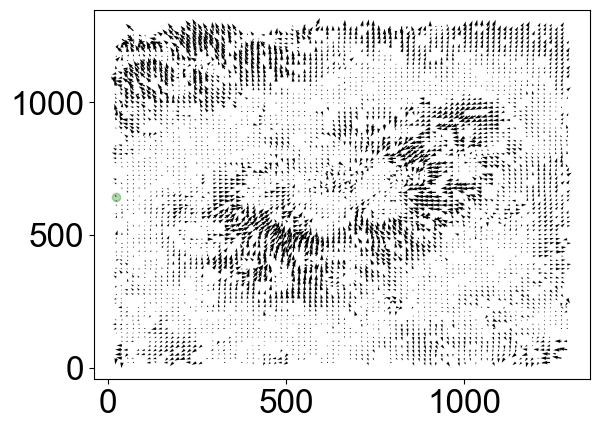

In [15]:
directions=np.arctan2(v,u)
# Define threshold angle (in radians)
threshold_angle = np.deg2rad(10)  # You can adjust this threshold as needed

# Group vectors based on their direction
groups = []
for i in range(len(directions)):
    grouped = False
    for group in groups:
        if np.any(np.abs(group - directions[i]) < threshold_angle):
            group.append(directions[i])
            grouped = True
            break
    if not grouped:
        groups.append([directions[i]])

# Calculate centroid for each group
central_points = []
for group in groups:
    group_indices = np.where(np.isin(directions, group))
    group_x = x[group_indices]
    group_y = y[group_indices]
    centroid = np.mean(group_x), np.mean(group_y)
    central_points.append(centroid)

# Plot vectors
fig, ax = plt.subplots()
ax.quiver(x, y, u, v)
#find point closet to the center
center_x = np.mean(x)
center_y = np.mean(y)
centerdist=np.sqrt(np.sum((central_points-np.array([center_x,center_y]))**2,axis=1))
closest_index=np.argmin(centerdist)
ax.scatter(central_points[closest_index][0], central_points[closest_index][1], color='red', label='Center Point')
distances = np.sqrt(( - center_x)**2 + (y - center_y)**2)
center_index = np.argmin(distances)

ax.scatter(x[center_index], y[center_index], color='green',alpha=0.3, label='Center Point')

# Add legend
#ax.legend()

# Show plot
plt.show()


In [10]:
class CircularAverageAnalyzer:
    def __init__(self, folder_path):
        self.folder_path = folder_path

    def _load_data(self, file_path):
        """Load data from a text file."""
        return np.loadtxt(file_path, skiprows=3, delimiter=",")

    def _calculate_central_point(self, x, y, u, v):
        """Calculate the central point based on the weighted average of vector endpoints."""
        print(os.path.basename(os.path.basename(self.folder_path)))
        if "ResultsCenter" in os.listdir(self.folder_path):
            centerfile = pd.read_csv(self.folder_path+ "ResultsCenter.csv")
            central_x = centerfile['X'][0]
            central_y = centerfile['Y'][0]
        else:
            magnitude = np.sqrt(u**2 + v**2)
            central_x = np.mean(x * magnitude) / np.mean(magnitude)
            central_y = np.mean(y * magnitude) / np.mean(magnitude)
        return central_x, central_y

    def _calculate_circular_mean_magnitude(self, x, y, u, v, central_x, central_y, num_ranges=10):
        """Calculate the circular mean magnitude over distance from the center point."""
        magnitude = np.sqrt(u**2 + v**2)
        max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
        distances = np.linspace(0, max_radius, num_ranges)
        mean_magnitudes = []
        for i in range(num_ranges - 1):
            indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[i]) &
                               (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[i + 1]))
            mean_magnitude = np.mean(magnitude[indices])
            mean_magnitudes.append(mean_magnitude)
        return distances[:-1], mean_magnitudes
    def _calculate_mean_magnitude(self, u, v):
        """Calculate the mean magnitude over all vectors."""
        magnitude = np.sqrt(u**2 + v**2)
        return np.mean(magnitude)
    
    def analyze_files(self):
        """Analyze all text files in the folder."""
        file_paths = sorted([os.path.join(self.folder_path, f) for f in os.listdir(self.folder_path) if f.endswith('.txt')])
        mean_magnitudes_over_distances = []
        timemagnitude=[]
        for file_path in file_paths:
            data = self._load_data(file_path)
            x, y, u, v = data[:, 0], data[:, 1], data[:, 2], data[:, 3]
            central_x, central_y = self._calculate_central_point(x, y, u, v)
            distances, mean_magnitudes = self._calculate_circular_mean_magnitude(x, y, u, v, central_x, central_y)
            mean_magnitudes_over_distances.append(mean_magnitudes)
            timemagnitude.append(self._calculate_mean_magnitude( u, v))
        return distances, mean_magnitudes_over_distances,timemagnitude

    def plot_mean_magnitudes_over_distances(self,show=False):
        """Plot the mean magnitude over distance from the center point for each time point."""
        distances, mean_magnitudes_over_distances,timemag = self.analyze_files()
        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        cmap=mpl.colormaps['viridis']
        for i, mean_magnitudes in enumerate(mean_magnitudes_over_distances):
            plt.plot(distances, mean_magnitudes, label=f'Timepoint {i + 1}', marker='o',color=cmap(1-i/len(mean_magnitudes_over_distances)))
        positionname=find(r'TimeSrs\d+',self.folder_path)[0]
        plt.xlabel('Distance from center')
        plt.ylabel('Mean Magnitude')
        #plt.title('Mean Magnitude Over Distance from Center for Different Timepoints')
        #plt.legend()
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.png",dpi=300,bbox_inches='tight',transparent=True,format='png')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.svg",dpi=300,bbox_inches='tight',transparent=True,format='svg')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.pdf",dpi=300,bbox_inches='tight',transparent=True,format='pdf')
        if show:    
            plt.show()
        else:
            plt.close()

    def plot_mean_magnitudes(self,show=False):
        """Plot the mean magnitude over consecutive timepoints."""
        _, __,timemag = self.analyze_files()
        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        positionname=find(r'TimeSrs\d+',self.folder_path)[0]
        plt.plot(range(1, len(timemag) + 1), timemag,color="#83bb03", marker='o')
        plt.xlabel('Timepoint')
        plt.ylabel('Mean Magnitude')
        #plt.title('Mean Magnitude Over Consecutive Timepoints')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Consecutive_Timepoints.png",dpi=300,bbox_inches='tight',transparent=True,format='png')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Consecutive_Timepoints.svg",dpi=300,bbox_inches='tight',transparent=True,format='svg')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Consecutive_Timepoints.pdf",dpi=300,bbox_inches='tight',transparent=True,format='pdf')
        if show:
            plt.show()
        else:
            plt.close()




# Example usage:
#analyzer = CircularAverageAnalyzer(testfolder)
#analyzer.plot_mean_magnitudes_over_distances(show=True)

In [11]:
class MeanCircdusolei:
    def __init__(self,folder):
        self.folder=folder
        self.files=glob(folder+"*.txt")
        self.dataframe=pd.DataFrame()
        self.mean_magnitudes_over_distances = []
        self.mean_magnitudes_over_distancesone = []
        self.timemagnitude = []


    def _load_data(self, file_path):
        "loading data from a txt file exported from PIVlab"
        return np.loadtxt(file_path, skiprows=3, delimiter=",")
    def _centralpoint(self,folder):
        print(os.listdir(folder))
        if "ResultsCenter.csv" in os.listdir(folder):
            centerfile = pd.read_csv(folder+ "ResultsCenter.csv")
            central_x = centerfile['X'][0]
            central_y = centerfile['Y'][0]
            return(central_x,central_y)
            print(f"Central point found in {folder}it is {central_x},{central_y}")

        else:
            print(f"Central point not found in {folder}")
            return None
        
    def _calculate_mean_magnitude(self, x, y, u, v, central_x, central_y, num_ranges=10):
        """Calculate the circular mean magnitude over distance from the center point."""
        magnitude = np.sqrt(u**2 + v**2)
        max_radius = np.max(np.sqrt((x - central_x)**2 + (y - central_y)**2))
        distances = np.linspace(0, max_radius, num_ranges)
        mean_magnitudes = []
        for i in range(num_ranges - 1):
            indices = np.where((np.sqrt((x - central_x)**2 + (y - central_y)**2) >= distances[i]) &
                               (np.sqrt((x - central_x)**2 + (y - central_y)**2) < distances[i + 1]))
            mean_magnitude = np.mean(magnitude[indices])
            mean_magnitudes.append(mean_magnitude)
        return distances[:-1], mean_magnitudes
    def analyze_files(self):
        """Analyze all text files in the folder."""
        file_paths = sorted([os.path.join(self.folder, f) for f in os.listdir(self.folder) if f.endswith('.txt')])
        self.mean_magnitudes_over_distances = []
        self.timemagnitude=[]
        for index,file_path in enumerate(file_paths):
            data = self._load_data(file_path)
            x, y, u, v = data[:, 0], data[:, 1], data[:, 2], data[:, 3]
            central_x, central_y = self._centralpoint(self.folder)
            distances, mean_magnitudes = self._calculate_circular_mean_magnitude(x, y, u, v, central_x, central_y)
            self.mean_magnitudes_over_distances.append(mean_magnitudes)
            self. timemagnitude.append(self._calculate_mean_magnitude( u, v))
            if index==0:
                self.mean_magnitudes_over_distancesone=self.mean_magnitudes_over_distances
        return distances, self.mean_magnitudes_over_distances,self.timemagnitude,self.mean_magnitudes_over_distancesone
    def _adddatatoframe(self,mean_magnitudes_over_distancesone):
        #passing mean magnitude over distance to a dataframe
        self.dataframe[f"{os.path.basename(self.folder)}_Mean_Magnitude"]=mean_magnitudes_over_distancesone

    def plot_mean_magnitudes_over_distances(self,show=True):
        """Plot the mean magnitude over distance from the center point for each time point."""
        distances, mean_magnitudes_over_distances,timemag = self.analyze_files()
        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        cmap=mpl.colormaps['viridis']
        for i, mean_magnitudes in enumerate(mean_magnitudes_over_distances):
            plt.plot(distances, mean_magnitudes, label=f'Timepoint {i + 1}', marker='o',color=cmap(1-i/len(mean_magnitudes_over_distances)))
        positionname=find(r'TimeSrs\d+',self.folder_path)[0]
        plt.xlabel('Distance from center')
        plt.ylabel('Mean Magnitude')
        plt.title('Mean Magnitude Over Distance from Center for Different Timepoints')
        plt.legend()
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.png",dpi=300,bbox_inches='tight',transparent=True,format='png')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.svg",dpi=300,bbox_inches='tight',transparent=True,format='svg')
        plt.savefig(f"{self.folder_path}{positionname}_Mean_Magnitude_Over_Distance.pdf",dpi=300,bbox_inches='tight',transparent=True,format='pdf')
        if show:    
            plt.show()
        else:
            plt.close()
    def plot_foldermean(self, show=True):
        """Plot the mean magnitude over consecutive timepoints."""

        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        cmap=mpl.colormaps['viridis']
        for i, mean_magnitudes in enumerate(self.dataframe.columns):
            plt.plot(range(1, len(mean_magnitudes) + 1), self.dataframe[column],color=cmap(1-i/len(self.dataframe.columns)), marker='o')
        if show:
            plt.show()
        else:
            plt.close()
            
MOfolder2="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/"
ASCIIfolder2=glob(MOfolder2+"TimeSrs*/PIV/ASCII/")
for i in tqdm(range(len(ASCIIfolder2))):
    analyzer = MeanCircdusolei(ASCIIfolder2[i])
    analyzer.plot_mean_magnitudes_over_distances()
    analyzer.plot_foldermean()

  0%|                                                                        | 0/10 [00:00<?, ?it/s]


['PIVlab_0001.txt', 'PIVlab_0001__.txt', 'PIVlab_0002.txt', 'PIVlab_0004.txt', 'PIVlab_0005.txt', 'PIVlab_0006.txt', 'PIVlab_0007.txt', 'PIVlab_0008.txt', 'PIVlab_0009.txt', 'PIVlab_0010.txt', 'PIVlab_0011.txt', 'PIVlab_0012.txt', 'PIVlab_0013.txt', 'PIVlab_0014.txt', 'PIVlab_0015.txt', 'PIVlab_0016.txt', 'PIVlab_0017.txt', 'PIVlab_0018.txt', 'PIVlab_0019.txt', 'PIVlab_0020.txt', 'PIVlab_0021.txt', 'PIVlab_0022.txt', 'PIVlab_0023.txt', 'PIVlab_0024.txt', 'PIVlab_0025.txt', 'PIVlab_0026.txt', 'PIVlab_0027.txt', 'PIVlab_0028.txt', 'PIVlab_0029.txt', 'PIVlab_0030.txt', 'PIVlab_0031.txt', 'PIVlab_0032.txt', 'PIVlab_0033.txt', 'PIVlab_0034.txt', 'PIVlab_0035.txt', 'PIVlab_0036.txt', 'PIVlab_0037.txt', 'PIVlab_0038.txt', 'PIVlab_0039.txt', 'PIVlab_0040.txt', 'PIVlab_0041.txt', 'PIVlab_0042.txt', 'PIVlab_0043.txt', 'PIVlab_0044.txt', 'PIVlab_0045.txt', 'PIVlab_0046.txt', 'PIVlab_0047.txt', 'PIVlab_0048.txt', 'PIVlab_0049.txt', 'PIVlab_0050.txt', 'PIVlab_0051.txt', 'PIVlab_0052.txt', 'PIVlab_0

AttributeError: 'MeanCircdusolei' object has no attribute '_calculate_circular_mean_magnitude'

In [12]:
controlfolder1="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing/"
Mofolder1="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/15022024_TgKrt18UtrWoundhealing/"
MOfolder2="H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing/"
controldict={}
MOdict={}
MOdict2={}

for fld in [controlfolder1,Mofolder1,MOfolder2]:

    for folder in glob(fld+"*/PIV/ASCII/"):
        print("folder: "+folder)
        analyzer = CircularAverageAnalyzer(folder)
        distances, mean_magnitudes_over_distances,_ = analyzer.analyze_files()
        if fld==controlfolder1:
            controldict[folder[-14:-11]]=mean_magnitudes_over_distances[0]
        elif fld==Mofolder1:
            MOdict[folder[-14:-11]]=mean_magnitudes_over_distances[0]
        elif fld==MOfolder2:
            MOdict2[folder[-14:-11]]=mean_magnitudes_over_distances[0]
        analyzer.plot_mean_magnitudes_over_distances()
        analyzer.plot_mean_magnitudes()

folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs02021\PIV\ASCII\


































































































































































folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs022\PIV\ASCII\



































































































































































































folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeSrs02324\PIV\ASCII\




















































































































































































folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/02_Feb/01022024_TgKrt18UtrWoundhealing\TimeS

C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



















folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0004\PIV\ASCII\









C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)

































folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0006\PIV\ASCII\










C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


























folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0008\PIV\ASCII\



C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0011\PIV\ASCII\






C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


























folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0012\PIV\ASCII\







C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)

























folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0015\PIV\ASCII\




C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
















































folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0016\PIV\ASCII\






C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)






















folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs0018\PIV\ASCII\





C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)






folder: H:/PHD_data/Imaging_et_analysis/SDlaserCuter/2024/03_Mar/07032023_TgK18GUtrmK4K8MOWoundhealing\TimeSrs007008009\PIV\ASCII\






C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Miniforge\envs\snBase\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


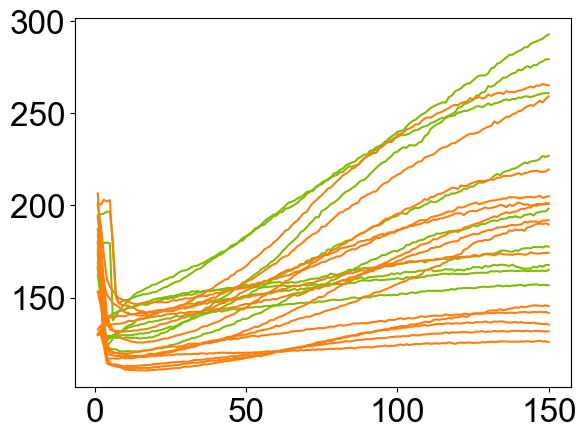

In [72]:
#plot the flow of tissue in YSL cuts
folderysl1="H:/PHD_data/Imaging_et_analysis/NikSD/2025/05_Mai/20052025_YSLCuts/"
def read_YSLcututrint(folder:str):
    """Read the YSL cut utrint file and return the data."""
    file_paths = glob(folder + "/*/*.csv")
    time=[]
    controlInts=[]
    MOInts=[]
    for file in file_paths:
        data = pd.read_csv(file)
        date= find(r'\d{8}', file)[0]
        fid= find(r'Pos\d+', file)[0]
        name= f"{date}_{fid}"
        plt.plot(data[" "][:150],data["Mean"][:150],label=file.split("/")[-2],color=["#83bb03"if "Control" in file else "#ff7f0e"][0])
        if "Control" in file:
            controlInts.append(data["Mean"][:150])
        elif "MO" in file:
            MOInts.append(data["Mean"][:150])
    time.append(data[" "][:150]*0.26)#in secs
    controlmean=np.mean(controlInts,axis=0)
    controlstd=np.std(controlInts,axis=0)
    MOmean=np.mean(MOInts,axis=0)
    MOstd=np.std(MOInts,axis=0)
    return(time,controlmean,controlstd,MOmean,MOstd)
time,controlmean,controlstd, momean,mostd=read_YSLcututrint(folderysl1)

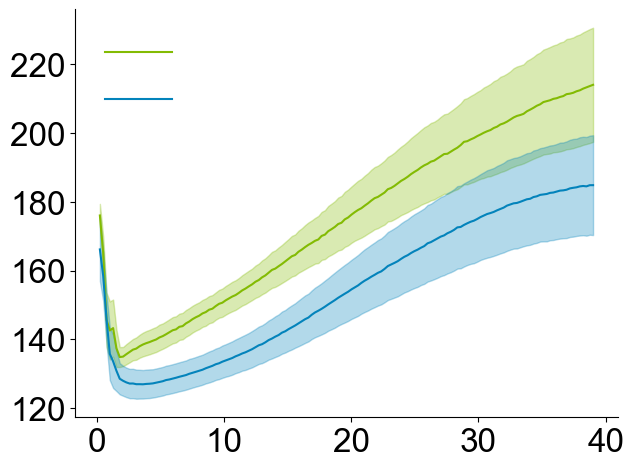

In [73]:
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(time[0], controlmean, label='         ', color="#83bb03")
plt.fill_between(time[0], controlmean - controlstd/3, controlmean + controlstd/3, color="#83bb03", alpha=0.3)
plt.plot(time[0], momean, label='                ', color="#0383bb")
plt.fill_between(time[0], momean - mostd/3, momean + mostd/3, color="#0383bb", alpha=0.3)
plt.legend(loc='best', frameon=False, fontsize=24)

plt.savefig('H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLHydrodynamiclength/YSLintensity.png', dpi=300, bbox_inches='tight', transparent=True, format='png')
plt.savefig('H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLHydrodynamiclength/YSLintensity.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.savefig('H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLHydrodynamiclength/YSLintensity.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
#pd.DataFrame({"Time":time[0],"ControlMean":controlmean,"ControlStd":controlstd,"MOmean":momean,"MOstd":mostd}).to_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLHydrodynamiclength/YSLHydrodynamiclength.csv",index=False)
plt.show()

In [ ]:
def PIV(folder:str):
    """Read the PIV data from the folder and return the data."""
    folder_paths = glob(folder + "/*/PIV/ASCII/")
    data = []
    for folders in folder_paths:
        date= find(r'\d{8}', folders)[0]
        pos= find(r'Pos\d+', folders)[0]
        name= f"{date}_{pos}"
        files = glob(folders+"/*.txt")
        print(f"Processing {name} with {len(files)} files")
        for file in files:
            file_data = np.loadtxt(file, skiprows=3, delimiter=",")
            x, y, u, v = file_data[:, 0], file_data[:, 1], file_data[:, 2], file_data[:, 3]
            center_x=np.max(x)/2
            mag= np.sqrt(u**2 + v**2)
            for ux in np.unique(x):
                indices = np.where(x == ux)
                magv = np.mean(mag[indices])
            fig, ax = plt.subplots(figsize=(7, 5.3))
            ax.quiver(x, y, u, v,mag, cmap='plasma', alpha=0.5)
        plt.close()
PIV(folderysl1)


Processing 20052025_Pos0003 with 149 files


C:\Users\snaik\AppData\Local\Temp\ipykernel_8860\2510575829.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 5.3))


Processing 20052025_Pos0004 with 149 files
Processing 20052025_Pos0005 with 300 files
Processing 20052025_Pos0007 with 300 files
Processing 20052025_Pos0009 with 298 files
Processing 20052025_Pos0010 with 300 files
Processing 20052025_Pos0012 with 300 files
Processing 20052025_Pos0013 with 300 files
Processing 20052025_Pos0020 with 301 files
Processing 20052025_Pos0021 with 300 files
Processing 20052025_Pos0022 with 300 files
Processing 20052025_Pos0023 with 300 files
Processing 20052025_Pos0024 with 300 files
Processing 20052025_Pos0025 with 300 files
Processing 20052025_Pos0026 with 300 files
Processing 20052025_Pos0027 with 300 files
Processing 20052025_Pos0028 with 300 files
Processing 20052025_Pos0029 with 300 files
Processing 20052025_Pos0030 with 300 files
Processing 20052025_Pos0033 with 300 files
Processing 20052025_Pos0034 with 300 files
Processing 20052025_Pos0035 with 300 files
